In [128]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
from datetime import date
pd.set_option("max_columns", None)

In [3]:
ds_dir = os.path.join(os.getcwd(), 'Datasets')
print(ds_dir)

C:\Users\liam.thornton\Documents\SF Local Python Projects\City of London Skills Review\Datasets


## Learner satisfication

In [4]:
ls_dict = {}
ls_ds_dir = os.path.join(ds_dir, 'Learner Satisfaction')

for file in os.listdir(ls_ds_dir):
    df = pd.read_csv(os.path.join(ls_ds_dir, file))
    string = file.split('_')
    key = string[4]
    ls_dict[key] = df

### Summary DF

In [6]:
## Formatting data set for analysis

def format_smry_df(df):
    # drop null rows
    test1 = df[np.logical_and(df['Final_Score'].notnull(), df['Learners'].isnull())]

    if len(test1) == 0:
        df = df[df['Final_Score'].notnull()]
        df = df[df['Final_Score']!= '-']
    for c in df.columns:
        try:
            df[c] = pd.to_numeric(df[c])
        except:
            pass
        
    print(df.dtypes)
    
    df.reset_index(drop=True, inplace=True)
    print(str(len(df) == len(df['Provider_Name'].unique())) + ' - each row is a unique provider')
    return df

smry_fdf = format_smry_df(smry_df)

Year                  object
UKPRN                  int64
Provider_Name         object
Organisation_Type     object
Final_Score          float64
MSRC                 float64
Learners               int64
Responses              int64
dtype: object
True - each row is a unique provider


#### By organisation type

In [7]:
## Exploratory analysis 

# By provider organisation type
ot_smry = smry_fdf.groupby('Organisation_Type')
ot_smry_stats1 = smry_fdf.groupby('Organisation_Type').agg({'Provider_Name': 'count',
                                                     'Learners' : ['mean', 'median', 'max', 'min', 'std'],
                                                     'Final_Score' : ['mean', 'median', 'max', 'min', 'std']})

ot_smry_stats2 = ot_smry.describe()
ot_smry_stats2 = ot_smry_stats2.iloc[:, ot_smry_stats2.columns.get_level_values(0)!='UKPRN']

for c in ot_smry_stats1.columns:
    ot_smry_stats1[c] = round(ot_smry_stats1[c],2)

for c in ot_smry_stats2.columns:
    ot_smry_stats2[c] = round(ot_smry_stats2[c],2)


ot_smry_stats1

Provider_Name Learners                       \
                                        count     mean  median    max   min   
Organisation_Type                                                             
General FE and Tertiary College           167  5695.03  5205.0  21619  1289   
Other Public Funded                        88  1662.72  1296.5  11423    22   
Private Sector Public Funded              334   816.20   318.0  30454    11   
Specialist College                         20  3991.65  2178.5  25425   159   

                                         Final_Score                      \
                                     std        mean median    max   min   
Organisation_Type                                                          
General FE and Tertiary College  2884.96       80.70  81.00   96.5  60.7   
Other Public Funded              1629.92       94.40  95.65   99.0  47.2   
Private Sector Public Funded     2057.86       85.82  88.20  100.0  43.8   
Specialist College               6214.83       81.05  80.70   97.7  48.7   

                                        
                                   std  
Organisation_Type                       
General FE and Tertiary College   6.10  
Other Public Funded               5.93  
Private Sector Public Funded     10.27  
Specialist College               12.26

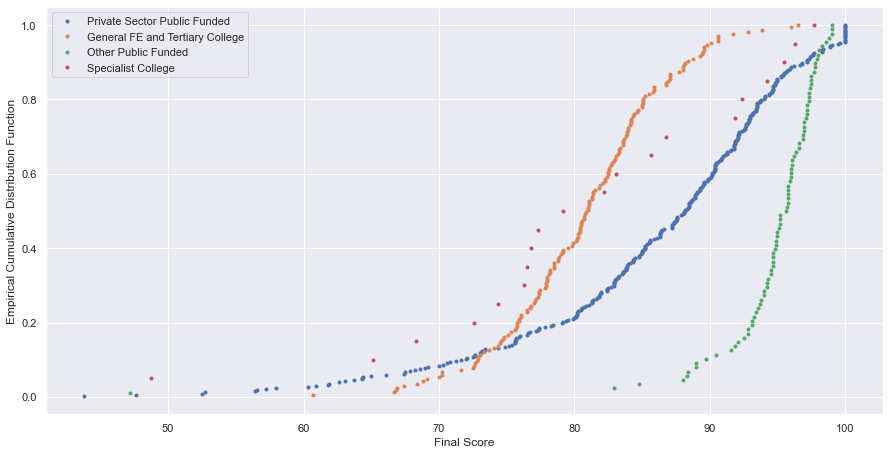

In [8]:
sns.set()
fig = plt.figure(figsize=(15,7.5))
for ot in smry_fdf['Organisation_Type'].unique():
    df = smry_fdf[smry_fdf['Organisation_Type'] == ot]
    x = np.sort(df['Final_Score'])
    y = np.arange(1, len(x)+1)/len(x)
    _ = plt.plot(x, y, marker = '.', linestyle='none')
#     percentiles = np.array([25,50,75])
#     ptiles = np.nanpercentile(x, percentiles)
#     _ = plt.plot(ptiles, percentiles/100, marker='D', linestyle='none')
#     _ = plt.legend(['ECDF', 'Quartiles'])

_ = plt.xlabel('Final Score')
_ = plt.ylabel('Empirical Cumulative Distribution Function')
_ = plt.legend(labels = smry_fdf['Organisation_Type'].unique())
_ = plt.show()

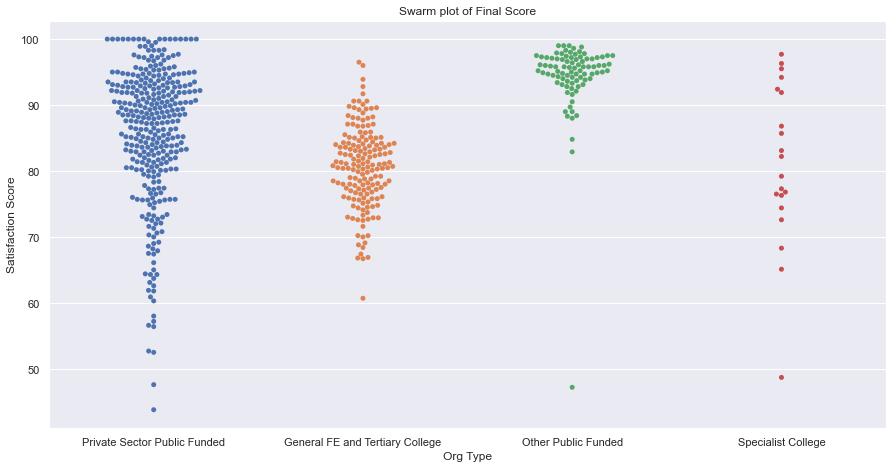

In [9]:
sns.set()
_ = plt.figure(figsize=(15,7.5))
_ = sns.swarmplot(x = 'Organisation_Type', y = 'Final_Score', data = smry_fdf)
_ = plt.xlabel('Org Type')
_ = plt.ylabel('Satisfaction Score')
_ = plt.title('Swarm plot of Final Score')

plt.show()

### By organisation size

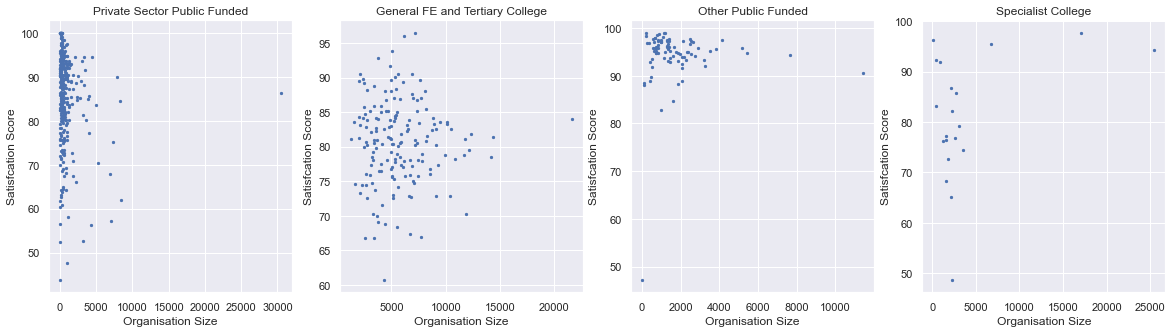

In [10]:
fig = plt.figure(figsize=(20,5))
sns.set()
for i,ot in enumerate(smry_fdf['Organisation_Type'].unique()):
    df = smry_fdf[smry_fdf['Organisation_Type'] == ot]
    _ = plt.subplot(1,4,i+1)
    _ = plt.scatter(df['Learners'], df['Final_Score'], s=5)
    _ = plt.xlabel('Organisation Size')
    _ = plt.ylabel('Satisfcation Score')
    _ = plt.title(ot)
    

plt.show()

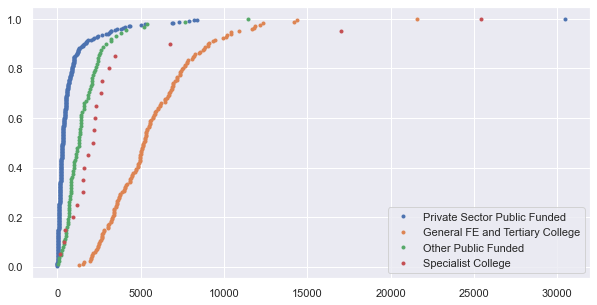

In [11]:
fig = plt.figure(figsize=(10,5))
for ot in smry_fdf['Organisation_Type'].unique():
    df = smry_fdf[smry_fdf['Organisation_Type'] == ot]
    x = np.sort(df['Learners'])
    y = np.arange(1, len(x)+1)/len(x)
    _ = plt.plot(x, y, marker = '.', linestyle='none')

_ = plt.legend(labels = smry_fdf['Organisation_Type'].unique())
plt.show()

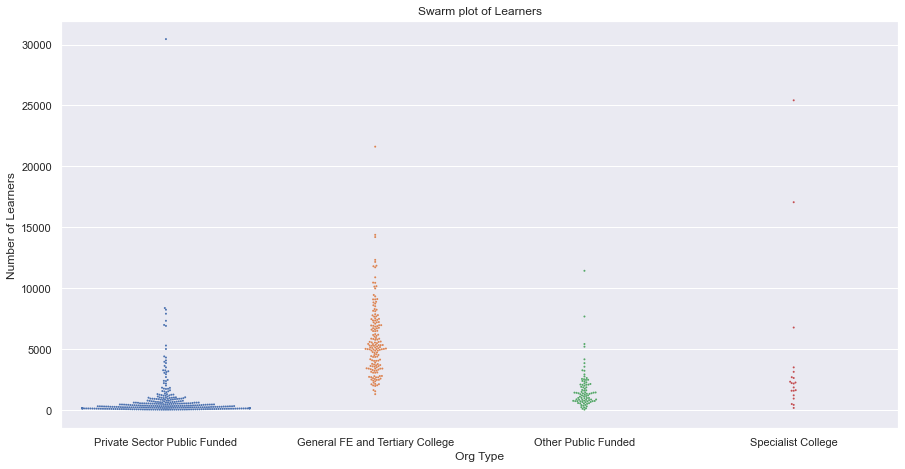

In [12]:
fig = plt.figure(figsize=(15,7.5))
_ = sns.swarmplot(x = 'Organisation_Type', y = 'Learners', size = 2, data = smry_fdf)
_ = plt.xlabel('Org Type')
_ = plt.ylabel('Number of Learners')
_ = plt.title('Swarm plot of Learners')

plt.show()

### Provider level data

In [1122]:
def create_filters(df):
    c1 = df['AgeBand'] == 'Total'
    c2 = df['Gender'] == 'Total'
    c3 = df['Provision'] == 'Total'
    c4 = df['LevelOfLearning'] == 'Total'
    c5 = df['LearningDifficulties'] == 'Total'
    c6 = df['ProviderType'] == 'Total'
    filters = [c1, c2, c3, c4, c5, c6]
    return filters


def apply_filters(df, seg_ind, keep_total):
    filters = create_filters(df)
    if seg_ind == 'none':
        pass
    elif keep_total==True:
        filters.pop(seg_ind)
    else:
        df = df[~filters[seg_ind]]
        filters.pop(seg_ind)
    for f in filters:
        df = df[f]
    df.reset_index(drop=True, inplace=True)
    return df

def parse_data(df, seg_ind, keep_total):
    df.replace(to_replace = 'c', value=np.nan, inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    for c in df.columns:
        if c in ['time_period', 'ProviderName']:
            df[c] = df[c].astype(str)
        else:
            try:
                df[c] = pd.to_numeric(df[c])
            except:
                pass
            
    filters = create_filters(df)
    df = apply_filters(df, seg_ind, keep_total)
    
    df = df.sort_values('time_period', ascending=True).reset_index(drop=True)
    
    # CoL only
    col_df = df[df['ProviderName'] == 'COMMON COUNCIL OF THE CITY OF LONDON'].reset_index(drop=True)
    
    # RoL (excludes CoL)
    rol_df = df[(df['region_name']=='London') & (df['ProviderName'] != 'COMMON COUNCIL OF THE CITY OF LONDON') & 
                (df['geographic_level']=='Provider')].reset_index(drop=True)
    
    # Ntl (excluding CoL)
    ntl_df = df[(df['ProviderName'] != 'COMMON COUNCIL OF THE CITY OF LONDON') & 
                (df['geographic_level']=='Provider') &
                (df['region_name']!='London')].reset_index(drop=True)
    
    return df, col_df, rol_df, ntl_df

In [1155]:
def parse_data2(df, seg_ind, keep_total):
    df.replace(to_replace = 'c', value=np.nan, inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    for c in df.columns:
        if c in ['time_period', 'ProviderName']:
            df[c] = df[c].astype(str)
        else:
            try:
                df[c] = pd.to_numeric(df[c])
            except:
                pass
            
    filters = create_filters(df)
    df = apply_filters(df, seg_ind, keep_total)
    
    df = df.sort_values('time_period', ascending=True).reset_index(drop=True)
    
    # CoL only
    col_df = df[df['ProviderName'] == 'COMMON COUNCIL OF THE CITY OF LONDON'].reset_index(drop=True)
    
    # RoL (excludes CoL)
    rol_df = df[(df['region_name']=='London')  & (df['geographic_level']=='Regional')].reset_index(drop=True)
    
    # Ntl (excluding CoL)
    ntl_df = df[(df['geographic_level']=='National')].reset_index(drop=True)
    
    return df, col_df, rol_df, ntl_df

### 1. Benchmarking

<ipython-input-1122-31116e3e4803>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]
C:\Users\liam.thornton\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\liam.thornton\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


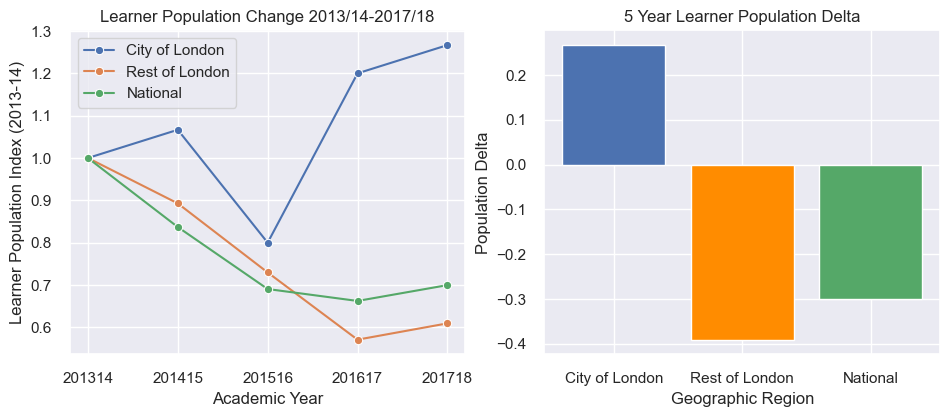

In [1193]:
pr, col_pr, rol_pr, ntl_pr = parse_data2(otcms['pr02'], 'none', True)
fig = plt.figure(figsize=(10,4))
col_lp = col_pr[['time_period', 'NumberOfLearners']]
rol_lp = rol_pr.groupby('time_period')[['NumberOfLearners']].sum().reset_index(drop=False)
ntl_lp = ntl_pr.groupby('time_period')[['NumberOfLearners']].sum().reset_index(drop=False)

lp_dfs = [col_lp, rol_lp, ntl_lp]

for df in lp_dfs:
    for i in df.index:
        df.loc[i, 'Indexed LP'] = df.loc[i, 'NumberOfLearners']/df.loc[0, 'NumberOfLearners']
        
plt.subplot(1,2,1)
_ = sns.lineplot(x='time_period', y='Indexed LP', data=col_lp, marker='o')
_ = sns.lineplot(x='time_period', y='Indexed LP', data=rol_lp, marker='o')
_ = sns.lineplot(x='time_period', y='Indexed LP', data=ntl_lp, marker='o')
_ = plt.legend(labels=geo_regions)
_ = plt.ylabel('Learner Population Index (2013-14)')
_ = plt.xlabel('Academic Year')
_ = plt.title('Learner Population Change 2013/14-2017/18')

pd_5y = pd.DataFrame(columns=['Area', '5yr Population Delta'])

for i, df in enumerate(lp_dfs):
#     end=float(df[df['time_period'] == '201718']['Indexed LP'])
#     start=df[df['time_period'] == '201314']['Indexed LP']
#     delta = end-start
    pdelta = float(df[df['time_period'] == '201718']['Indexed LP'] - 1)
    area = geo_regions[i]
    pd_5y = pd_5y.append({'Area':area, '5yr Population Delta':pdelta}, ignore_index=True)

plt.subplot(1,2,2)
_ = plt.bar(geo_regions, pd_5y['5yr Population Delta'], color=['b', 'darkorange', 'g'])
_ = plt.xlabel('Geographic Region')
_ = plt.ylabel('Population Delta')
_ = plt.title('5 Year Learner Population Delta')

<ipython-input-1122-31116e3e4803>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


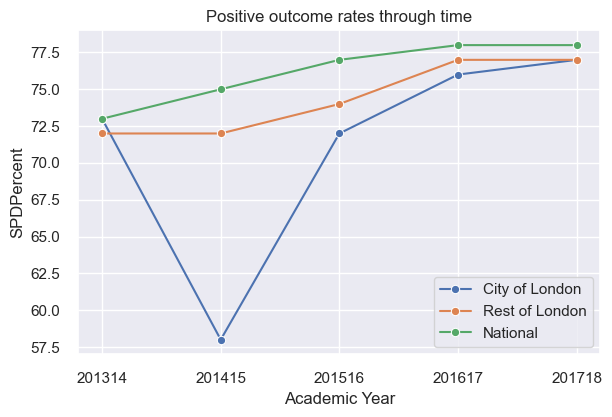

In [1194]:
pr, col_pr, rol_pr, ntl_pr = parse_data2(otcms['pr02'], 'none', True)
geo_regions = ['City of London', 'Rest of London', 'National']

fig = plt.figure(figsize=(6,4))
_ = sns.lineplot(x='time_period', y='SPDPercent', data=col_pr, marker = 'o')
_ = sns.lineplot(x='time_period', y='SPDPercent', data=rol_pr, marker = 'o')
_ = sns.lineplot(x='time_period', y='SPDPercent', data=ntl_pr, marker = 'o')
_ = plt.legend(labels = geo_regions)
_ = plt.title('Positive outcome rates through time', fontsize=12)
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('SPDPercent')
_ = plt.show()
fig.savefig('A2 Benchmarked Positive outcome rate through time.png', dpi=fig.dpi, bbox_inches='tight')

<ipython-input-1122-31116e3e4803>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


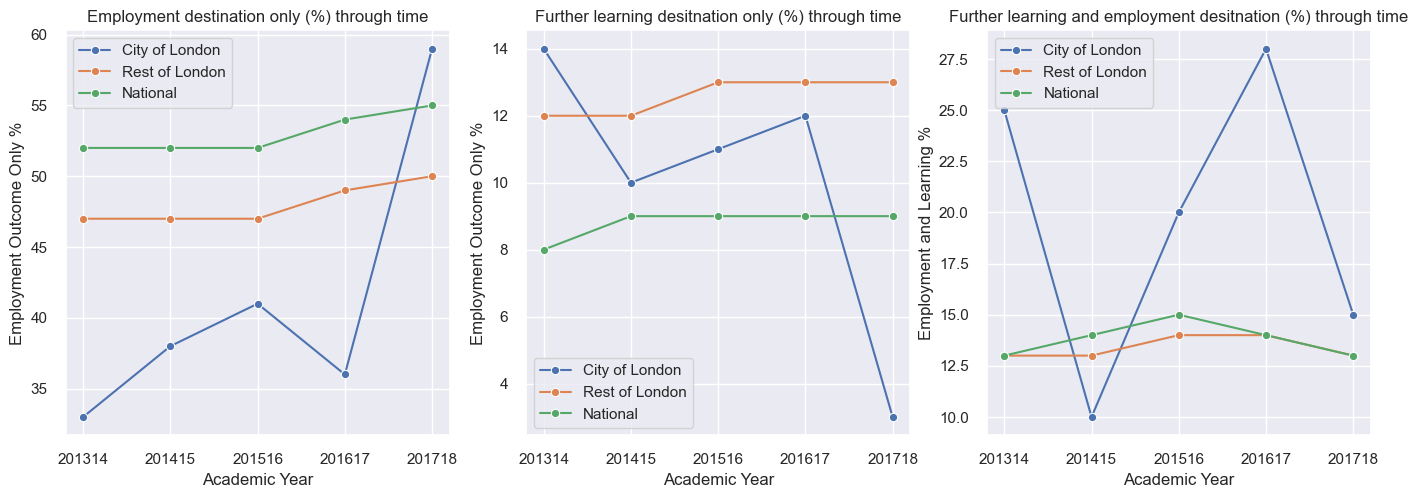

In [1200]:
pr, col_pr, rol_pr, ntl_pr = parse_data2(otcms['pr02'], 'none', True)
geo_regions = ['City of London', 'Rest of London', 'National']

fig = plt.figure(figsize=(15,5))
_ = plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y='EmpOnlyPercent', data=col_pr, marker = 'o')
_ = sns.lineplot(x='time_period', y='EmpOnlyPercent', data=rol_pr, marker = 'o')
_ = sns.lineplot(x='time_period', y='EmpOnlyPercent', data=ntl_pr, marker = 'o')
_ = plt.legend(labels = geo_regions)
_ = plt.title('Employment destination only (%) through time', fontsize=12)
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Employment Outcome Only %')

_ = plt.subplot(1,3,2)
_ = sns.lineplot(x='time_period', y='LearnOnlyPercent', data=col_pr, marker = 'o')
_ = sns.lineplot(x='time_period', y='LearnOnlyPercent', data=rol_pr, marker = 'o')
_ = sns.lineplot(x='time_period', y='LearnOnlyPercent', data=ntl_pr, marker = 'o')
_ = plt.legend(labels = geo_regions)
_ = plt.title('Further learning desitnation only (%) through time', fontsize=12)
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Employment Outcome Only %')

_ = plt.subplot(1,3,3)
_ = sns.lineplot(x='time_period', y='EmpAndLearnPercent', data=col_pr, marker = 'o')
_ = sns.lineplot(x='time_period', y='EmpAndLearnPercent', data=rol_pr, marker = 'o')
_ = sns.lineplot(x='time_period', y='EmpAndLearnPercent', data=ntl_pr, marker = 'o')
_ = plt.legend(labels = geo_regions)
_ = plt.title('Further learning and employment desitnation (%) through time', fontsize=12)
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Employment and Learning %')
fig.savefig('A3 Benchmarked Positive outcome rate through time.png', dpi=fig.dpi, bbox_inches='tight')

<ipython-input-1122-31116e3e4803>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


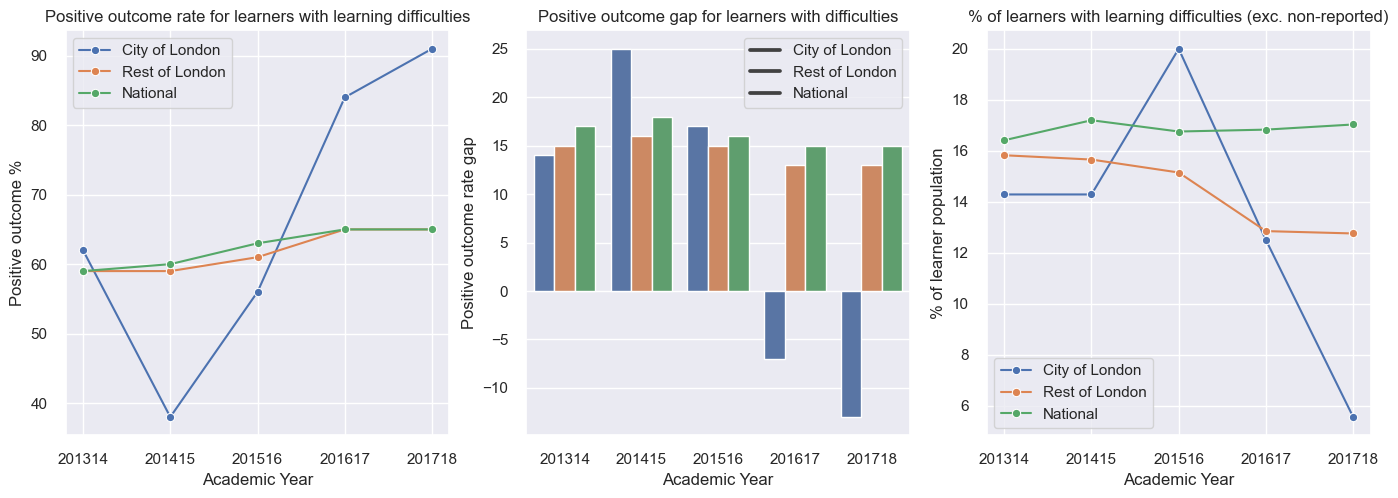

In [1202]:
## benchmarking CoL performance to RoL and NtL for LD users
ld, col_ld, rol_ld, ntl_ld = parse_data2(otcms['pr02'], 4, False)
fig = plt.figure(figsize=(15,5))

reg_labels = ['City of London', 'Rest of London', 'National']
plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y='SPDPercent', data=col_ld[col_ld['LearningDifficulties'] == 'Learning Difficulties/Disability'], marker='o')
_ = sns.lineplot(x='time_period', y='SPDPercent', data=rol_ld[rol_ld['LearningDifficulties'] == 'Learning Difficulties/Disability'], marker='o')
_ = sns.lineplot(x='time_period', y='SPDPercent', data=ntl_ld[ntl_ld['LearningDifficulties'] == 'Learning Difficulties/Disability'], marker='o')
_ = plt.legend(labels = reg_labels)
_ = plt.title('Positive outcome rate for learners with learning difficulties', fontsize=12)
_ = plt.ylabel('Positive outcome %')
_ = plt.xlabel('Academic Year')

plt.subplot(1,3,2)
ld_dfs = [col_ld, rol_ld, ntl_ld]
barplot = pd.DataFrame()
for i,df in enumerate(ld_dfs):
    df1 = df[df['LearningDifficulties'] != 'Not known/ Not provided']
    df2 = df1[df1['LearningDifficulties'] == 'Learning Difficulties/Disability'][['time_period','SPDPercent']].reset_index(drop=True)
    df3 = df1[df1['LearningDifficulties'] == 'No Learning Difficulties/Disability'][['time_period','SPDPercent']].reset_index(drop=True)
    df4 = df2.merge(df3, on='time_period', how='inner', suffixes = ('_ld', '_nld'))
    df4['ld_SPD_gap'] = df4['SPDPercent_nld'] - df4['SPDPercent_ld']
    df4['Geographic region'] = reg_labels[i]
#     _ = sns.lineplot(x='time_period', y='ld_SPD_gap', data = df4, marker = 'o')
    barplot = barplot.append(df4)

_ = sns.barplot(x = 'time_period', y='ld_SPD_gap', hue='Geographic region', data=barplot )
_ = plt.legend(labels = reg_labels)
_ = plt.title('Positive outcome gap for learners with difficulties', fontsize=12)
_ = plt.ylabel('Positive outcome rate gap')
_ = plt.xlabel('Academic Year')

plt.subplot(1,3,3)
ldp_df = pd.DataFrame(columns = ['time_period','NumberOfLearners_ld', 'NumberOfLearners_nld', 'ld_%', 'geographic_region'])
for i, df in enumerate(ld_dfs):
    df1 = df[df['LearningDifficulties'] != 'Not known/ Not provided']
    df2 = df1[df1['LearningDifficulties'] == 'Learning Difficulties/Disability'].groupby('time_period')[['NumberOfLearners']].sum()
    df3 = df1[df1['LearningDifficulties'] == 'No Learning Difficulties/Disability'].groupby('time_period')[['NumberOfLearners']].sum()
    df4 = df2.join(df3, how='inner', lsuffix = '_ld', rsuffix = '_nld')
    df4['ld_%'] = (df4['NumberOfLearners_ld']/(df4['NumberOfLearners_ld'] + df4['NumberOfLearners_nld']))*100
    if i == 0:
        df4['geographic_region'] = 'City of London'
    elif i == 1:
        df4['geographic_region'] = 'Rest of London'
    elif i == 2:
        df4['geographic_region'] = 'National'
    df4.reset_index(drop=False, inplace=True)
    ldp_df = ldp_df.append(df4)

_ = sns.lineplot(x='time_period', y='ld_%', hue='geographic_region', data=ldp_df, marker ='o')
_ = plt.title('% of learners with learning difficulties (exc. non-reported)', fontsize=12)
_ = plt.ylabel('% of learner population')
_ = plt.legend(labels = reg_labels)
_ = plt.xlabel('Academic Year')
plt.show()

## note on the % of ld students - % is of those that have specified learning disabled or not (does not include unstated pop)
fig.savefig('A4 Learning difficulties benchmarking.png', dpi=fig.dpi, bbox_inches='tight')

<ipython-input-1122-31116e3e4803>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


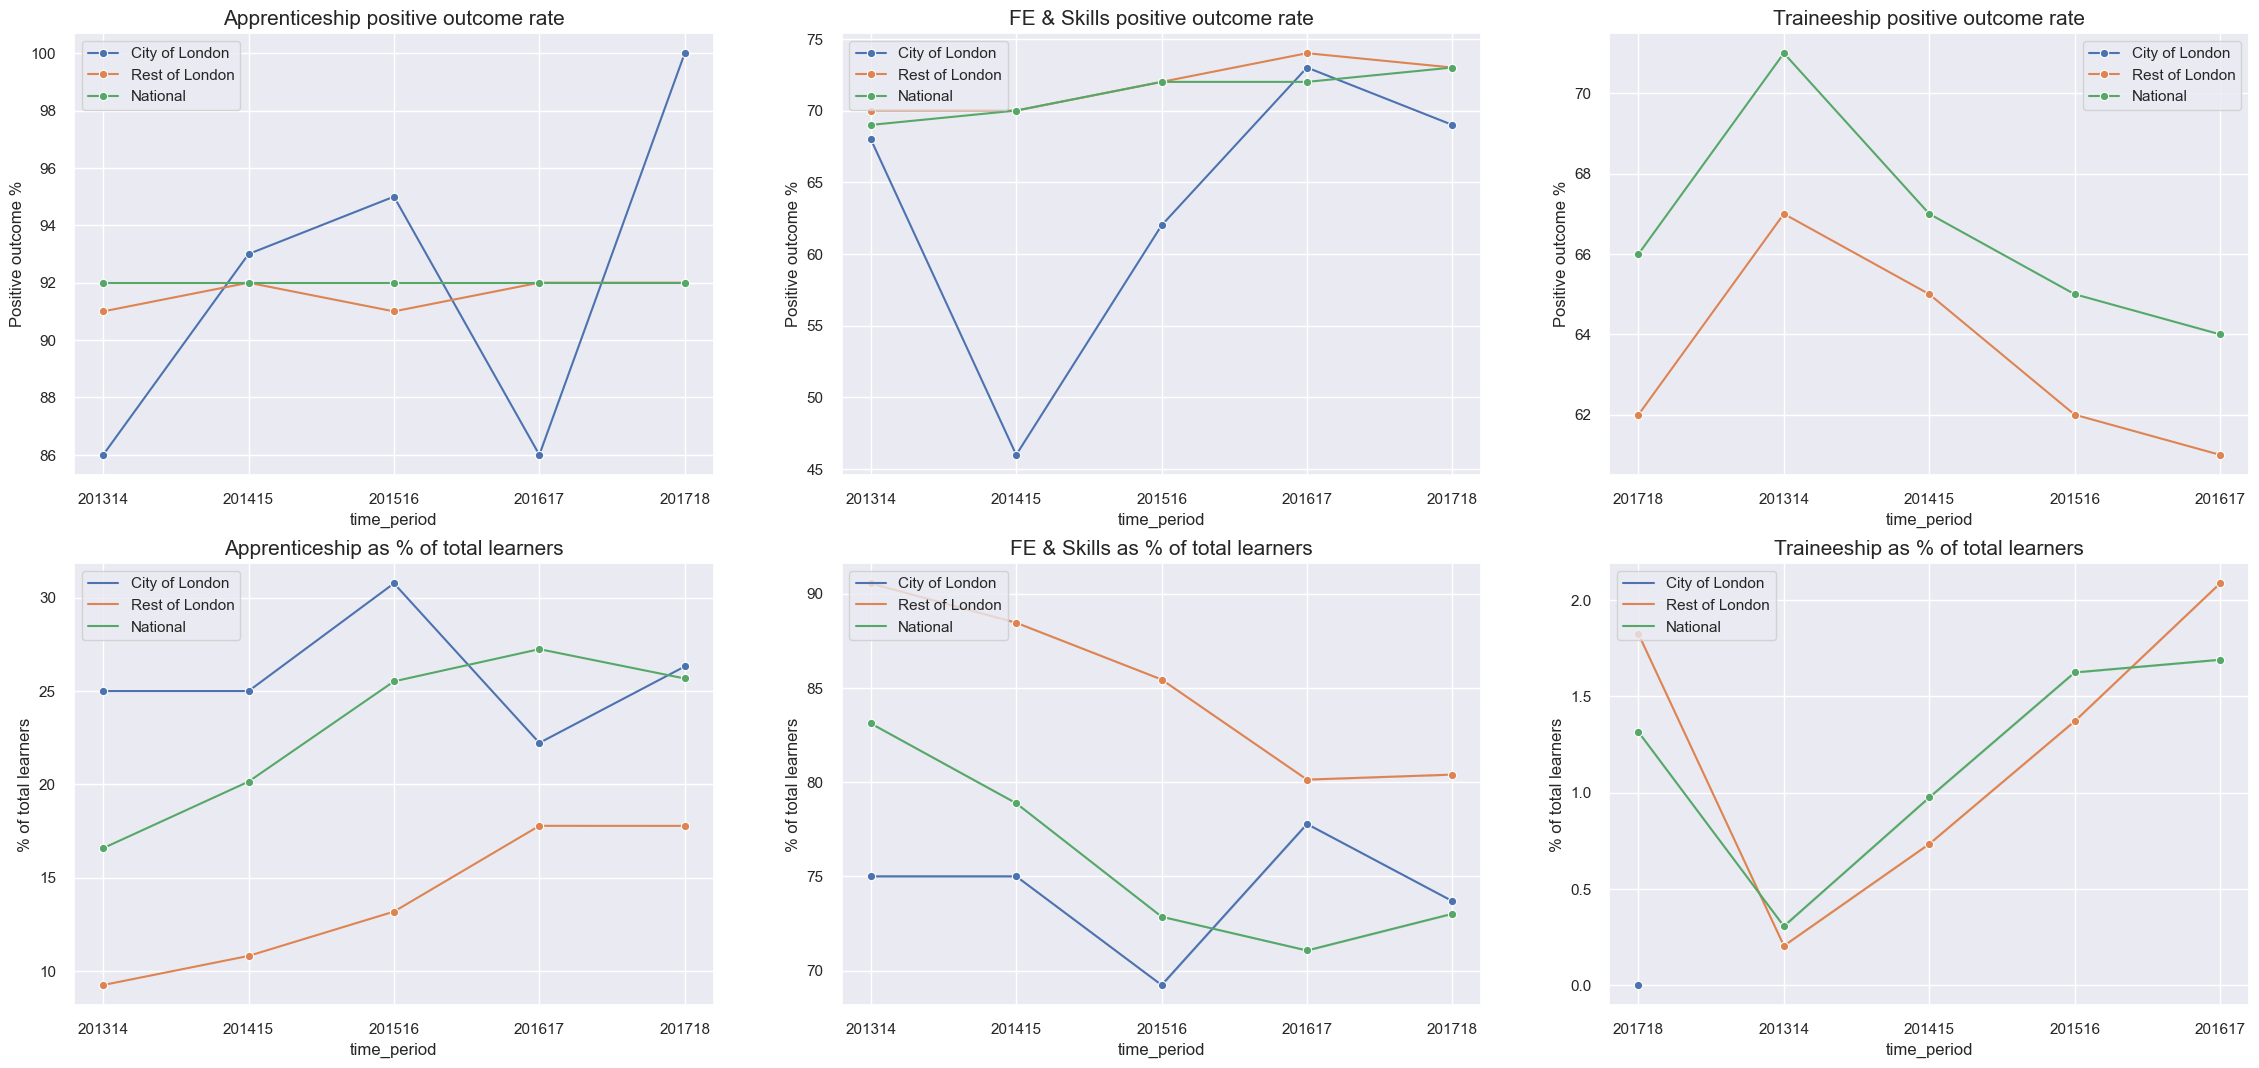

In [1197]:
## row 1 - Benchmarking positive destination rates by provision type to rest of london and England
pt, col_pt, rol_pt, ntl_pt = parse_data2(otcms['pr02'], 2, False)
fig = plt.figure(figsize = (25,12))

provision_types = col_pt['Provision'].unique()
pt_dfs = [col_pt, rol_pt, ntl_pt]
reg_labels = ['City of London', 'Rest of London', 'National']
ptp_df = pd.DataFrame(columns = ['time_period', 'Provision', 'pt_%', 'geographic_region'])

for i, pt in enumerate(provision_types):
    plot_index = i + 1
    _ = plt.subplot(2,3,plot_index)
    for df in pt_dfs:
        _ = sns.lineplot(x='time_period', y='SPDPercent', data = df[df['Provision']==pt], marker = 'o')
        _ = plt.legend(labels = reg_labels)
        _ = plt.title(pt + ' positive outcome rate', fontsize=15)
        _ = plt.ylabel('Positive outcome %')

    
    for i, df in enumerate(pt_dfs):
        df = df.groupby(['time_period', 'Provision'])[['NumberOfLearners']].sum().reset_index(drop=False)
        df['total_learners'] = df.groupby('time_period')['NumberOfLearners'].transform('sum')
        df['pt_%'] = (df['NumberOfLearners']/df['total_learners'])*100
        df = df[['time_period', 'Provision', 'pt_%']]
        df['geographic_region'] = reg_labels[i]
        ptp_df = ptp_df.append(df).reset_index(drop=True)
    
    
    _ = plt.subplot(2,3,plot_index + 3)
    _ = sns.lineplot(x='time_period',y='pt_%', data=ptp_df[ptp_df['Provision']==pt], hue='geographic_region', marker ='o')
    _ = plt.title(pt + ' as % of total learners', fontsize=15)
    _ = plt.ylabel('% of total learners')
    _ = plt.legend(loc='upper left')

fig.savefig('A5 Provisiont type benchmarking.png', dpi=fig.dpi)

<ipython-input-1122-31116e3e4803>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


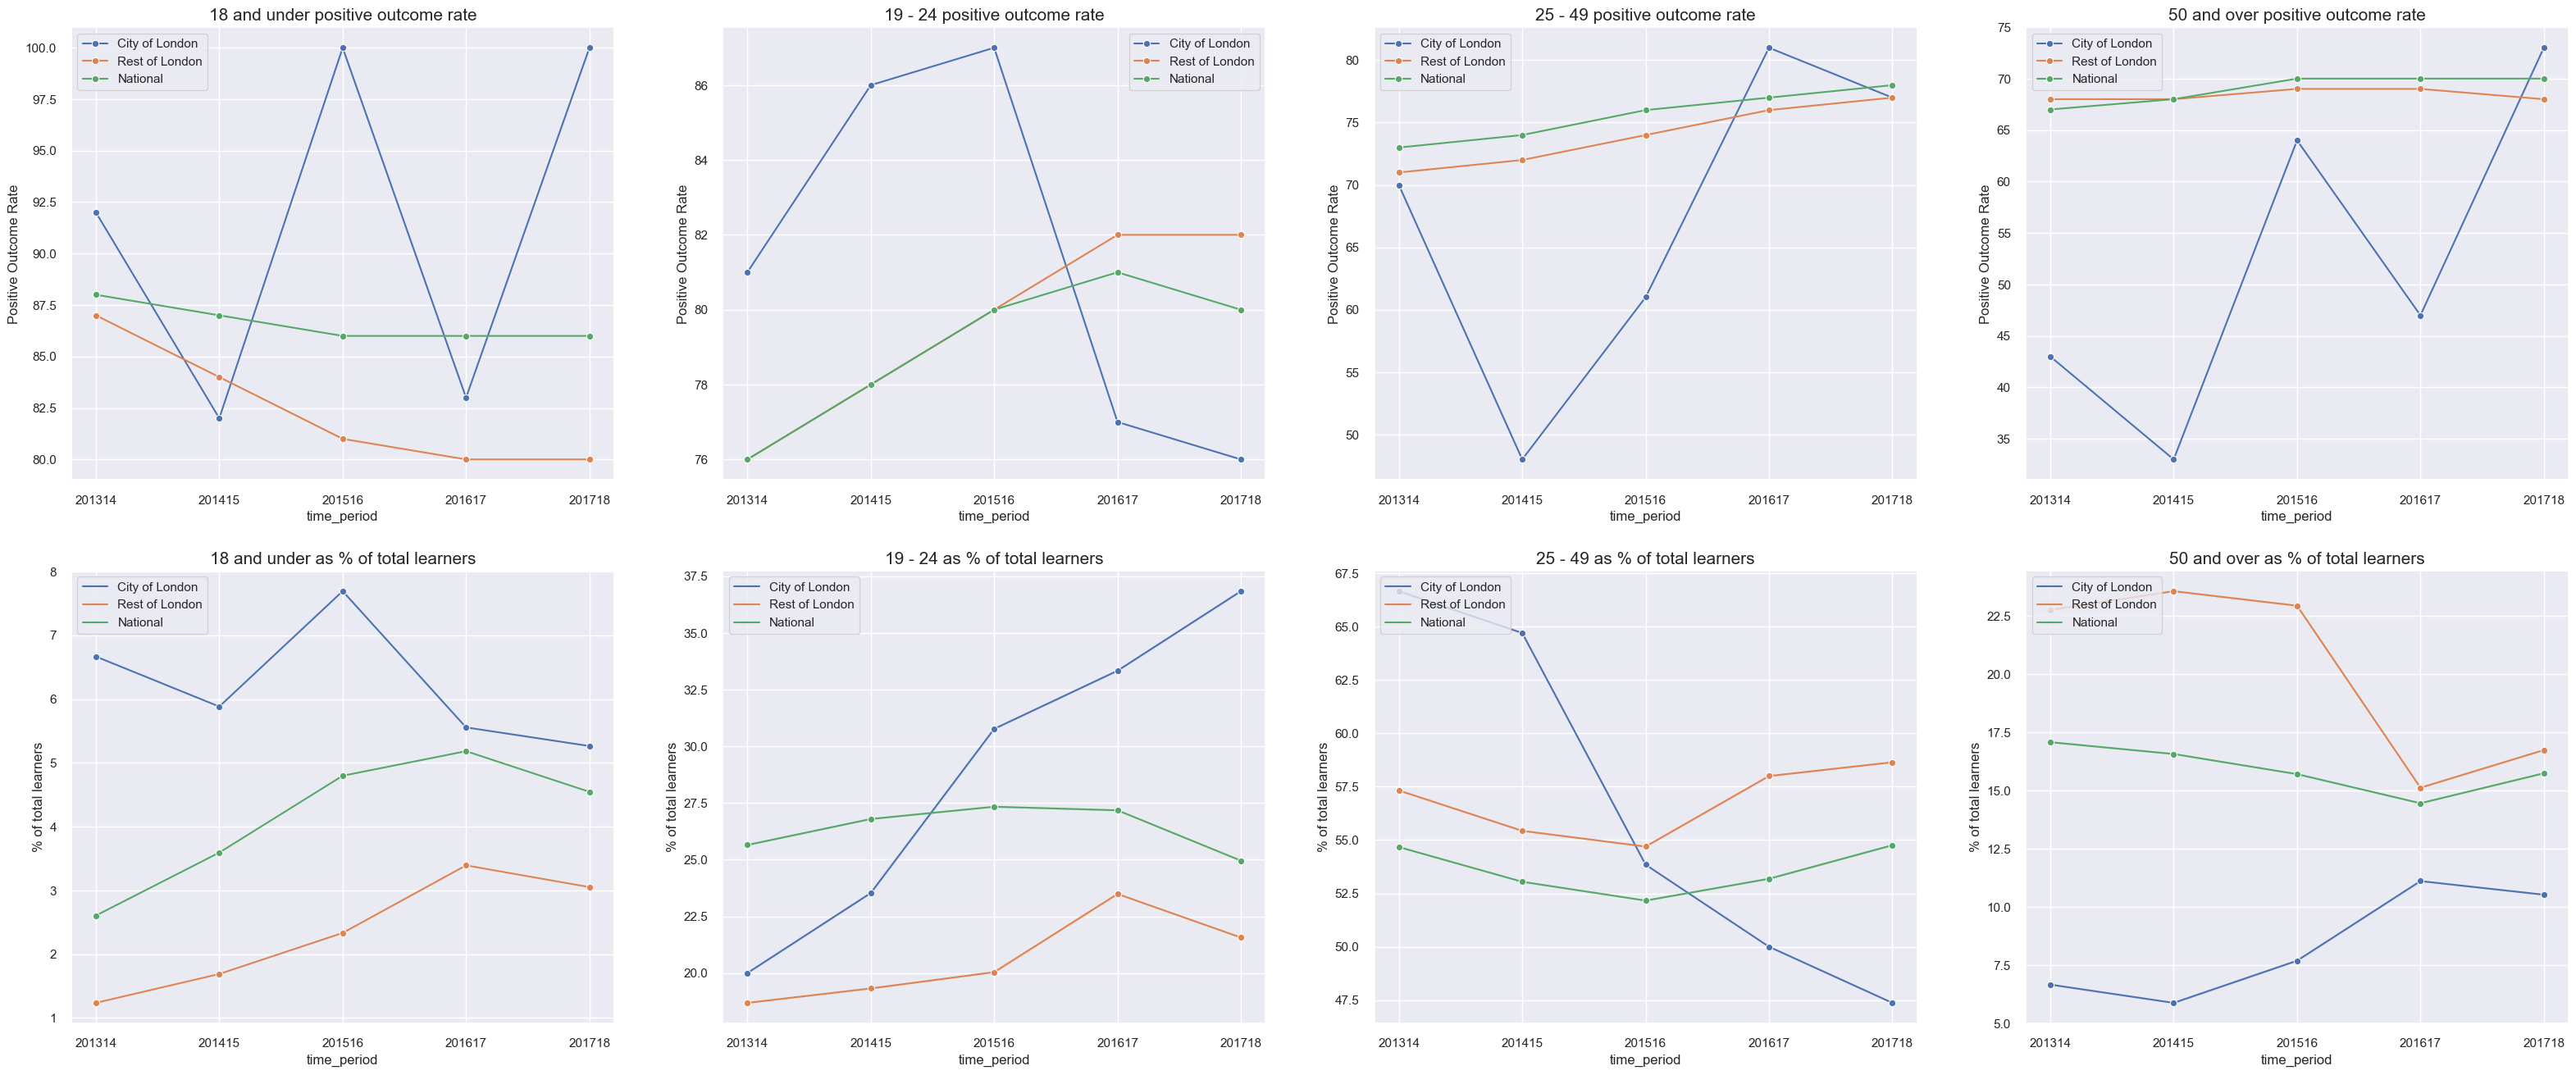

In [1198]:
age, col_age, rol_age, ntl_age = parse_data2(otcms['pr02'], 0, False)

fig = plt.figure(figsize = (35,15))

age_bands = sorted(col_age['AgeBand'].unique())
age_dfs = [col_age, rol_age, ntl_age]
reg_labels = ['City of London', 'Rest of London', 'National']
abp_df = pd.DataFrame()

for i, age in enumerate(age_bands):
    plot_index = i + 1
    _ = plt.subplot(2,4,plot_index)
    for df in age_dfs:
        _ = sns.lineplot(x='time_period', y='SPDPercent', data = df[df['AgeBand']==age], marker = 'o')
        _ = plt.legend(labels = reg_labels)
        _ = plt.title(age + ' positive outcome rate', fontsize=15)
        _ = plt.ylabel('Positive Outcome Rate')
    
    for i, df in enumerate(age_dfs):
        df = df.groupby(['time_period', 'AgeBand'])[['NumberOfLearners']].sum().reset_index(drop=False)
        df['total_learners'] = df.groupby('time_period')['NumberOfLearners'].transform('sum')
        df['ab_%'] = (df['NumberOfLearners']/df['total_learners'])*100
        df = df[['time_period', 'AgeBand', 'ab_%']]
        df['geographic_region'] = reg_labels[i]
        abp_df = abp_df.append(df).reset_index(drop=True)
    
    _ = plt.subplot(2,4,plot_index + 4)
    _ = sns.lineplot(x='time_period',y='ab_%', data=abp_df[abp_df['AgeBand']==age], hue='geographic_region', marker = 'o')
    _ = plt.title(age + ' as % of total learners', fontsize=15)
    _ = plt.ylabel('% of total learners')
    _ = plt.legend(loc='upper left')

fig.savefig('A6 Age bucket type benchmarking.png', dpi=fig.dpi, bbox_inches='tight')

<ipython-input-1122-31116e3e4803>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


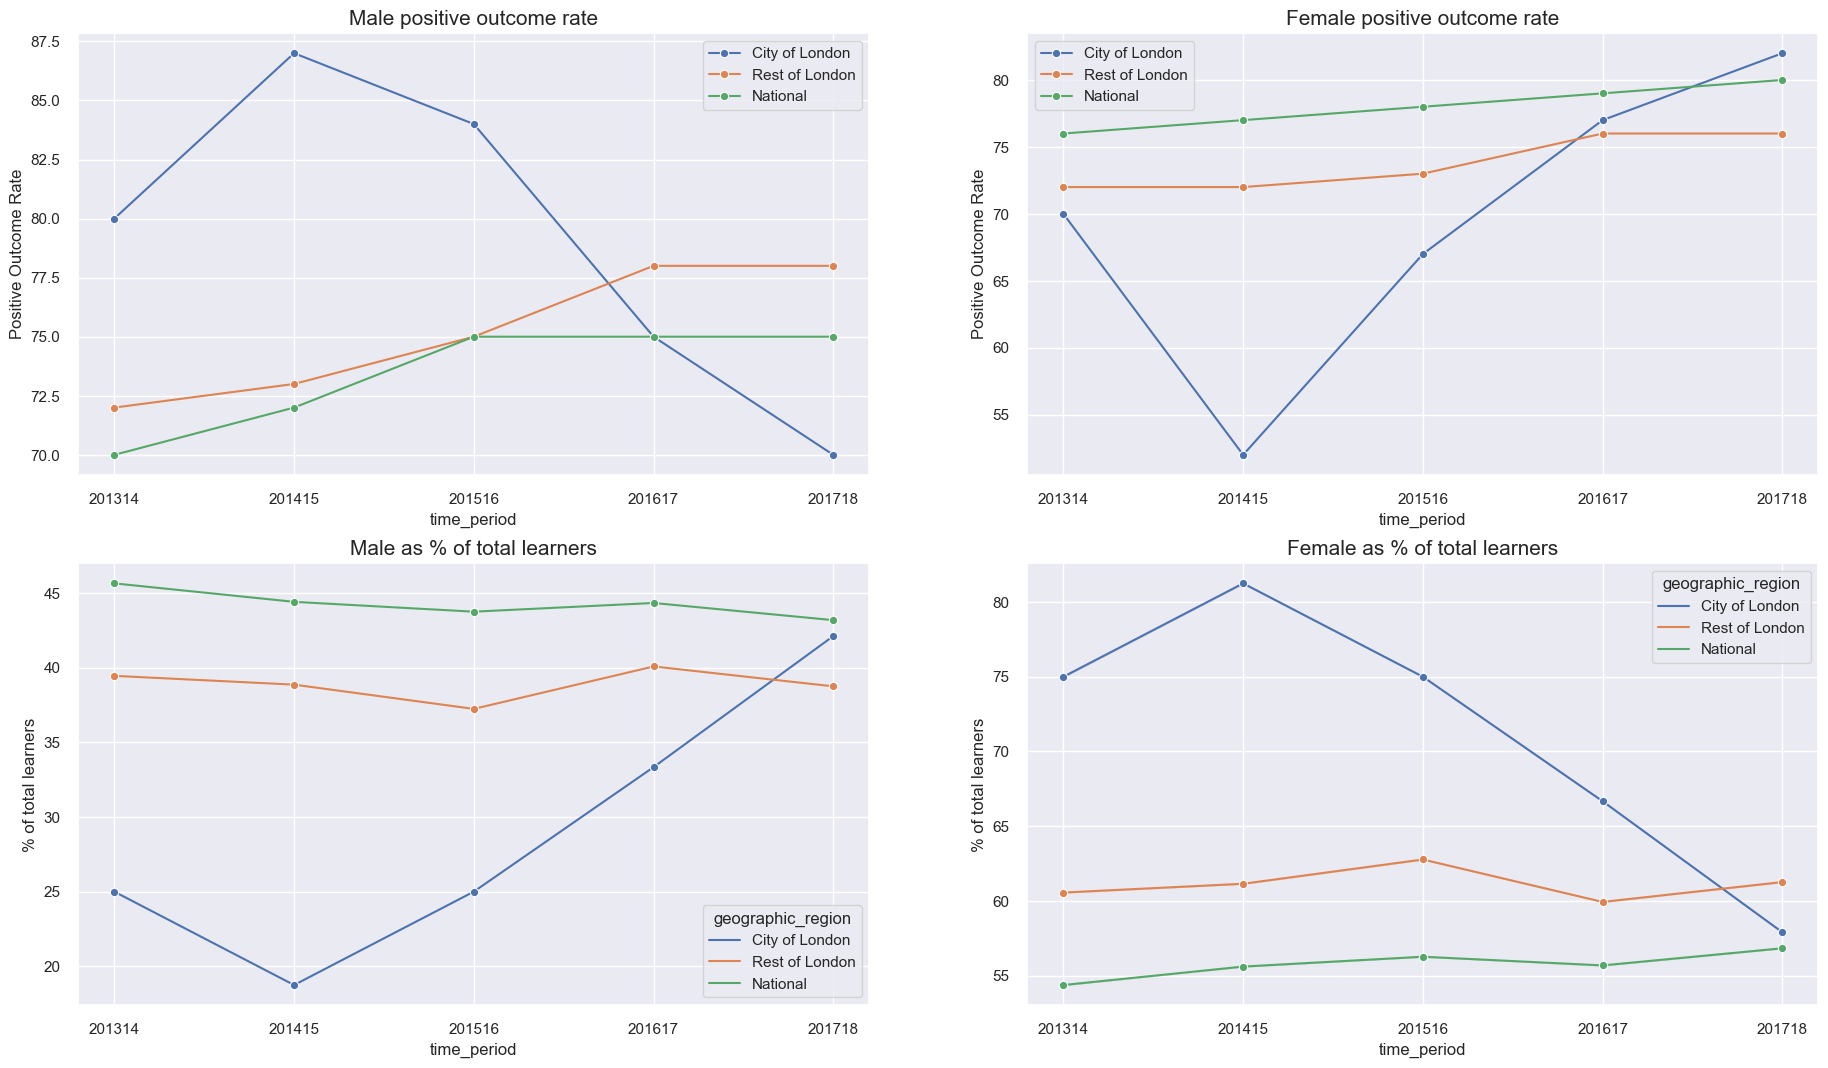

In [1199]:
gn, col_gn, rol_gn, ntl_gn = parse_data2(otcms['pr02'], 1, False)

fig = plt.figure(figsize = (20,12))

genders = col_gn['Gender'].unique()
gn_dfs = [col_gn, rol_gn, ntl_gn]
reg_labels = ['City of London', 'Rest of London', 'National']
gnp_df = pd.DataFrame()

for i, g in enumerate(genders):
    plot_index = i + 1
    _ = plt.subplot(2,2,plot_index)
    for df in gn_dfs:
        _ = sns.lineplot(x='time_period', y='SPDPercent', data = df[df['Gender']==g], marker = 'o')
        _ = plt.legend(labels = reg_labels)
        _ = plt.title(g + ' positive outcome rate', fontsize=15)
        _ = plt.ylabel('Positive Outcome Rate')
    
    for i, df in enumerate(gn_dfs):
        df = df.groupby(['time_period', 'Gender'])[['NumberOfLearners']].sum().reset_index(drop=False)
        df['total_learners'] = df.groupby('time_period')['NumberOfLearners'].transform('sum')
        df['gn_%'] = (df['NumberOfLearners']/df['total_learners'])*100
        df = df[['time_period', 'Gender', 'gn_%']]
        df['geographic_region'] = reg_labels[i]
        gnp_df = gnp_df.append(df).reset_index(drop=True)
    
    
    _ = plt.subplot(2,2,plot_index + 2)
    _ = sns.lineplot(x='time_period',y='gn_%', data=gnp_df[gnp_df['Gender']==g], hue='geographic_region', marker = 'o')
    _ = plt.title(g + ' as % of total learners', fontsize=15)
    _ = plt.ylabel('% of total learners')

plt.show()
fig.savefig('A7 Gender type benchmarking.png', dpi=fig.dpi)

## 2. Borough-specifc analysis

In [13]:
outcomes_dir = os.path.join(ds_dir, 'Outcomes Success')
files = os.listdir(outcomes_dir)
otcms = {}
csv_files = []
for f in files:
    if f.endswith('.csv'):
        csv_files.append(f)
        split_name = f.split('.')
        key = split_name[0]
        try:
            otcms[key] = pd.read_csv(outcomes_dir + '//' + f, low_memory=False)
        except:
            pass
    else:
        pass

In [16]:
def create_filters(df):
    c1 = df['AgeBand'] == 'Total'
    c2 = df['Gender'] == 'Total'
    c3 = df['Provision'] == 'Total'
    c4 = df['LevelOfLearning'] == 'Total'
    c5 = df['LearningDifficulties'] == 'Total'
    filters = [c1, c2, c3, c4, c5]
    return filters


def apply_filters(df, seg_ind, keep_total):
    filters = create_filters(df)
    if seg_ind == 'none':
        pass
    elif keep_total==True:
        filters.pop(seg_ind)
    else:
        df = df[~filters[seg_ind]]
        filters.pop(seg_ind)
    for f in filters:
        df = df[f]
    df.reset_index(drop=True, inplace=True)
    return df

def parse_data(df, seg_ind, keep_total):
    df.replace(to_replace = 'c', value=np.nan, inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    for c in df.columns:
        if c == 'time_period':
            df[c] = df[c].astype(str)
        else:
            try:
                df[c] = pd.to_numeric(df[c])
            except:
                pass
            
    filters = create_filters(df)
    df = apply_filters(df, seg_ind, keep_total)
    
    df = df.sort_values('time_period', ascending=True).reset_index(drop=True)
    
    # CoL only
    col_df = df[df['la_name'] == 'City of London'].reset_index(drop=True)
    
    # RoL (excludes CoL)
    rol_df = df[(df['region_name']=='London') & (df['la_name']!='City of London') & 
                (df['geographic_level']=='Local authority')].reset_index(drop=True)
    
    # Ntl (excluding CoL)
    ntl_df = df[(df['la_name'] != 'City of London') & 
                (df['geographic_level']=='Local authority')].reset_index(drop=True)
    
    return df, col_df, rol_df, ntl_df

<ipython-input-16-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


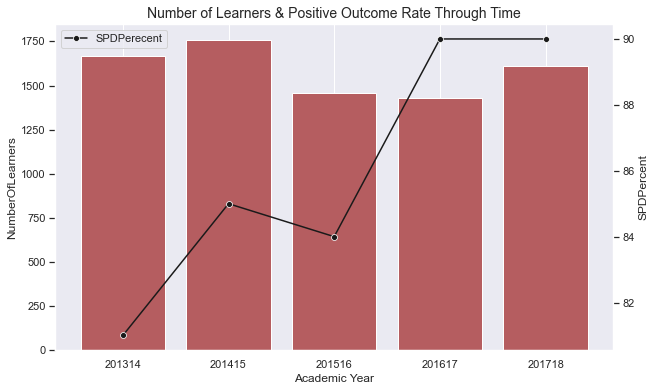

In [17]:
## number of outcomes achieved and % of positive outcomes through time 
df, col_df, rol_df, ntl_df = parse_data(otcms['ea01'], 'none', True)
oa = col_df

fig, ax1 = plt.subplots(figsize=(10,6))
ax1 = sns.barplot(x = 'time_period', y = 'NumberOfLearners', data=oa, color = 'r')
ax1.set_xlabel('Academic Year', fontsize=12)
ax1.tick_params(axis='y')
ax1.grid(None)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'time_period', y = 'SPDPercent', data=oa, color='k', marker = 'o')
ax2.grid(None)
plt.legend(['SPDPerecent'])
plt.title('Number of Learners & Positive Outcome Rate Through Time', fontsize=14)

fig.savefig('NoL & PO through time.png')

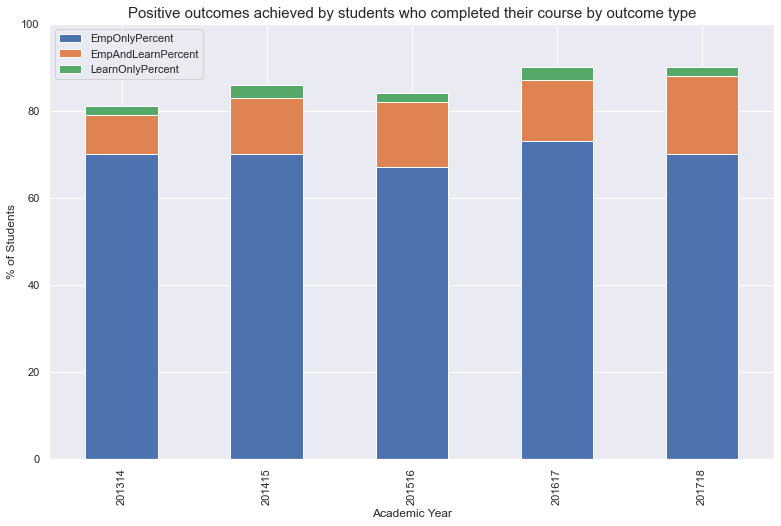

In [18]:
stck_plt=oa[['time_period', 'SPDPercent','EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].set_index('time_period')

plot = stck_plt.sort_values('time_period', ascending=True)[['EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].plot.bar(stacked=True, figsize=(13,8))  
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('% of Students')
_ = plt.title('Positive outcomes achieved by students who completed their course by outcome type', fontsize = 15)
_ = plt.ylim(0,100)
_ = plt.legend(labels = ['EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent'], loc = 'upper left' )
plt.show()

fig = plot.get_figure()
fig.savefig('positive destination by type.png')

<ipython-input-16-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


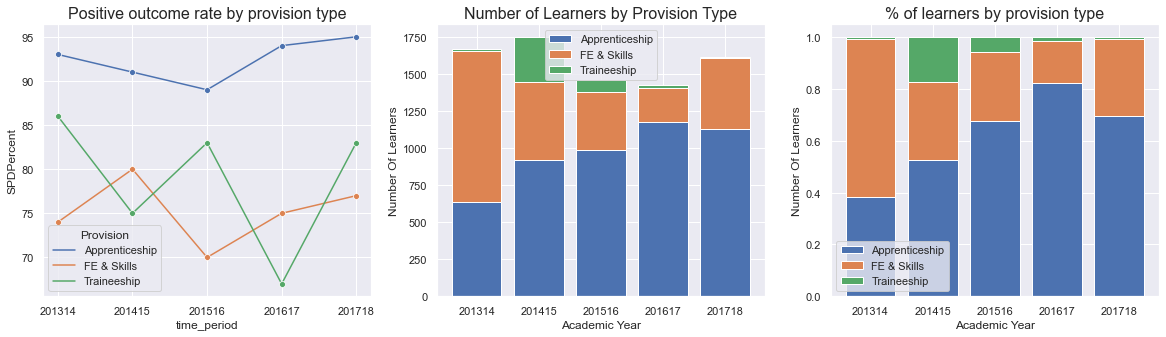

['Apprenticeship' 'FE & Skills' 'Traineeship']


In [20]:
## Segmenting - Provision Type
pt, col_pt, rol_pt, ntl_pt = parse_data(otcms['ea01'], 2, False)

# grp
pt_gp = col_pt.groupby(['time_period', 'Provision'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
pt_gp.reset_index(drop=False, inplace=True)


# plotting outcomes achieved

fig = plt.figure(figsize=(20, 5))

_ = plt.subplot(1,3,1)
_ = sns.lineplot(x = 'time_period', y = 'SPDPercent', hue ='Provision', data = pt_gp, marker = 'o')
_ = plt.title('Positive outcome rate by provision type', fontsize=16)

# _ = plt.subplot(3,2,2)
# _ = sns.lineplot(x = 'time_period', y = 'EmpAndLearnPercent', hue='Provision', data = pt_gp, marker = 'o')
# _ = plt.title('Employment and learning sustainment rate by provision type', fontsize=16)

# _ = plt.subplot(3,2,3)
# _ = sns.lineplot(x = 'time_period', y = 'EmpOnlyPercent', hue ='Provision', data = pt_gp, marker = 'o')
# _ = plt.title('Employment only sustainment rate by provision type', fontsize=16)

# _ = plt.subplot(3,2,4)
# _ = sns.lineplot(x='time_period', y='LearnOnlyPercent', hue='Provision', data = pt_gp, marker = 'o')
# _ = plt.title('Learning only sustainment rate by provision type', fontsize=16)

# bar chart showing breakdown of NumberOfLearners by Provision type per year
x = pt_gp['time_period'].unique()

fe = np.array(pt_gp[pt_gp['Provision'] == 'FE & Skills']['NumberOfLearners'])
app = np.array(pt_gp[pt_gp['Provision'] == 'Apprenticeship']['NumberOfLearners'])
trp = np.array(pt_gp[pt_gp['Provision'] == 'Traineeship']['NumberOfLearners'])

sns.set()
plt.subplot(1,3,2)

_ = plt.bar(x, app)
_ = plt.bar(x, fe, bottom = app)
_ = plt.bar(x, trp, bottom=fe+app)
_ = plt.legend(labels = pt_gp['Provision'].unique())
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('Number of Learners by Provision Type', fontsize=16)

# stacked bar chart 
t = fe + app + trp
fe_p = fe/t
app_p = app/t
trp_p = trp/t

plt.subplot(1,3,3)

_ = plt.bar(x, app_p)
_ = plt.bar(x, fe_p, bottom=app_p)
_ = plt.bar(x, trp_p, bottom= fe_p + app_p)
_ = plt.legend(labels = pt_gp['Provision'].unique())
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('% of learners by provision type', fontsize=16)


plt.show()
fig.savefig('provision type.png', dpi=fig.dpi)
print(pt_gp['Provision'].unique())

<ipython-input-16-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


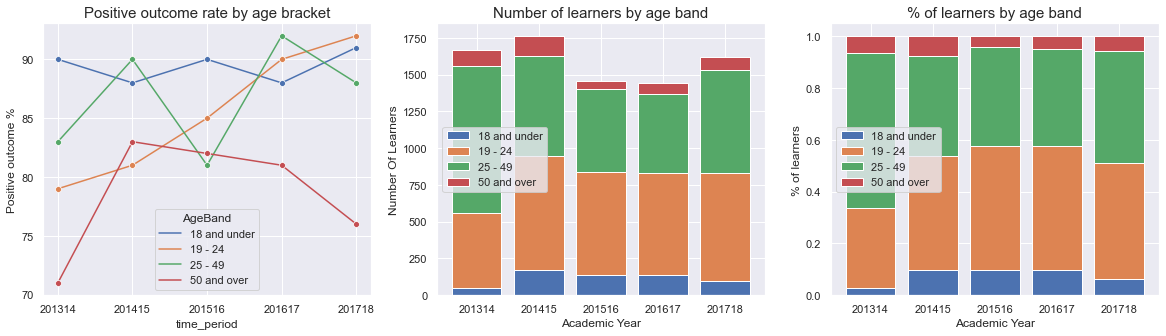

In [21]:
# subsetting dataframe 
age_df, col_age, rol_age, ntl_age = parse_data(otcms['ea01'], 0, False)

# grp
age_gp = col_age.groupby(['time_period', 'AgeBand'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
age_gp.reset_index(drop=False, inplace=True)
age_gp.head()

fig = plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y = 'SPDPercent', hue = 'AgeBand', data=age_gp, marker='o')
_ = plt.title('Positive outcome rate by age bracket', fontsize=15)
_ = plt.ylabel('Positive outcome %')

# plt.subplot(3,2,2)
# _ = sns.lineplot(x='time_period', y = 'EmpAndLearnPercent', hue = 'AgeBand', data=age_gp, marker='o')
# _ = plt.title('Employment and learning destination rate by age bracket', fontsize=18)

# plt.subplot(3,2,3)
# _ = sns.lineplot(x='time_period', y = 'EmpOnlyPercent', hue = 'AgeBand', data=age_gp, marker='o')
# _ = plt.title('Employment destination only rate by age bracket', fontsize=18)

# plt.subplot(3,2,4)
# _ = sns.lineplot(x='time_period', y = 'LearnOnlyPercent', hue = 'AgeBand', data=age_gp, marker='o')
# _ = plt.title('Learning destination only rate by age bracket', fontsize=18)

x = age_gp['time_period'].unique()

y18 = np.array(age_gp[age_gp['AgeBand'] == '18 and under']['NumberOfLearners'])
y19_24 = np.array(age_gp[age_gp['AgeBand'] == '19 - 24']['NumberOfLearners'])
y25_49 = np.array(age_gp[age_gp['AgeBand'] == '25 - 49']['NumberOfLearners'])
y50 = np.array(age_gp[age_gp['AgeBand'] == '50 and over']['NumberOfLearners'])

# bar chart showing breakdown of NumberOfLearners by AgeBand per year
sns.set()
plt.subplot(1,3,2)

_ = plt.bar(x, y18)
_ = plt.bar(x, y19_24, bottom=y18)
_ = plt.bar(x, y25_49, bottom=y18+y19_24)
_ = plt.bar(x, y50, bottom = y18+y19_24+y25_49)
_ = plt.legend(labels = age_gp['AgeBand'].unique())
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('Number of learners by age band', fontsize=15)

# stacked bar chart 
t = y18 + y19_24 + y25_49 + y50
y18_per = y18/t
y19_24_per = y19_24/t
y25_49_per = y25_49/t
y50_per = y50/t

plt.subplot(1,3,3)

_ = plt.bar(x, y18_per)
_ = plt.bar(x, y19_24_per, bottom=y18_per)
_ = plt.bar(x, y25_49_per, bottom=y18_per+y19_24_per)
_ = plt.bar(x, y50_per, bottom = y18_per+y19_24_per+y25_49_per)
_ = plt.legend(labels = age_gp['AgeBand'].unique())
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('% of learners by age band', fontsize=15)
_ = plt.ylabel('% of learners')

plt.show()
fig.savefig('Age band.png', dpi=fig.dpi)

<ipython-input-16-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


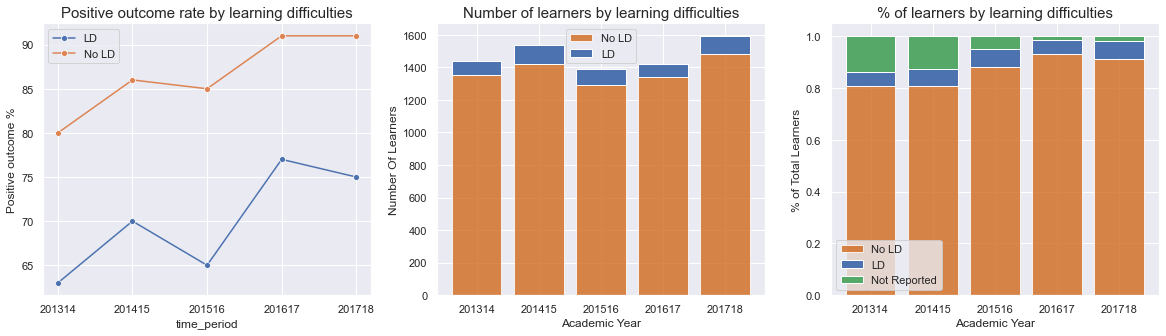

In [22]:
# subsetting dataframe 
ld_df, col_ld0, rol_ld, ntl_ld = parse_data(otcms['ea01'], 4, False)
col_ld = col_ld0[col_ld0['LearningDifficulties'] != 'Not known/ Not provided'].reset_index(drop=True)

# # grp
ld_gp0 = col_ld0.groupby(['time_period', 'LearningDifficulties'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
ld_gp = col_ld.groupby(['time_period', 'LearningDifficulties'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
ld_gp.reset_index(drop=False, inplace=True)
ld_gp0.reset_index(drop=False, inplace=True)

fig = plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y = 'SPDPercent', hue = 'LearningDifficulties', data=ld_gp, marker='o')
_ = plt.title('Positive outcome rate by learning difficulties', fontsize=15)
_ = plt.ylabel('Positive outcome %')
_ = plt.legend(['LD', 'No LD'])

# plt.subplot(3,2,2)
# _ = sns.lineplot(x='time_period', y = 'EmpAndLearnPercent', hue = 'LearningDifficulties', data=ld_gp, marker='o')
# _ = plt.title('Employment and learning destination rate by learning difficulties', fontsize=18)

# plt.subplot(3,2,3)
# _ = sns.lineplot(x='time_period', y = 'EmpOnlyPercent', hue = 'LearningDifficulties', data=ld_gp, marker='o')
# _ = plt.title('Employment destination only rate by learning difficulties', fontsize=18)

# plt.subplot(3,2,4)
# _ = sns.lineplot(x='time_period', y = 'LearnOnlyPercent', hue = 'LearningDifficulties', data=ld_gp, marker='o')
# _ = plt.title('Learning destination only rate by learning difficulties', fontsize=18)

x = ld_gp['time_period'].unique()

wld = np.array(ld_gp[ld_gp['LearningDifficulties'] == 'Learning Difficulties/Disability']['NumberOfLearners'])
wold = np.array(ld_gp[ld_gp['LearningDifficulties'] == 'No Learning Difficulties/Disability']['NumberOfLearners'])
na = np.array(ld_gp0[ld_gp0['LearningDifficulties'] == 'Not known/ Not provided']['NumberOfLearners'])

#bar chart showing breakdown of NumberOfLearners by AgeBand per year
sns.set()
plt.subplot(1,3,2)

_ = plt.bar(x, wold, color='chocolate', alpha=0.8)
_ = plt.bar(x, wld, bottom = wold, color='b')
_ = plt.legend(labels = ['No LD','LD'])
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('Number of learners by learning difficulties', fontsize=15)

#Stacked bar chart
t = wld + wold + na
wld_per = wld/t
wold_per = wold/t
na_per = na/t

plt.subplot(1,3,3)
_ = plt.bar(x, wold_per, color = 'chocolate', alpha=0.8)
_ = plt.bar(x, wld_per, bottom = wold_per, color='b')
_ = plt.bar(x, na_per, bottom = wold_per + wld_per, color = 'g')
_ = plt.legend(labels = ['No LD','LD', 'Not Reported'])
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('% of Total Learners')
_ = plt.title('% of learners by learning difficulties', fontsize=15)

plt.show()
fig.savefig('Learning Difficulties.png', dpi=fig.dpi)

<ipython-input-16-cfdaeced884d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


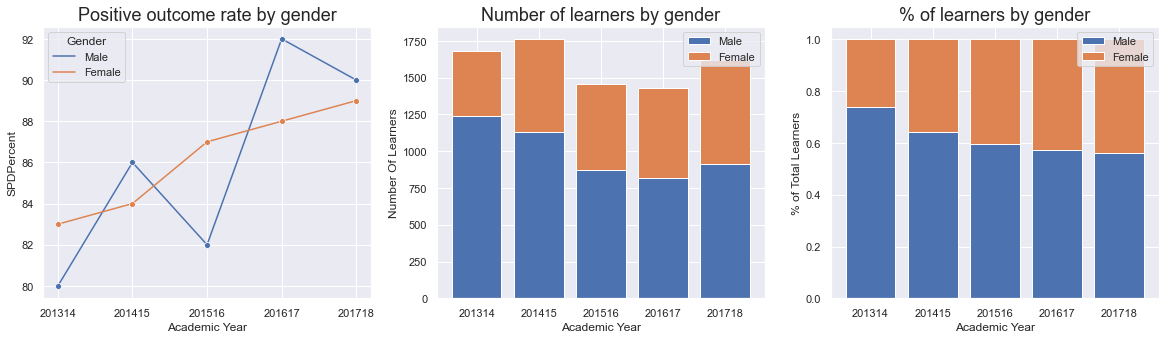

In [23]:
# subsetting dataframe 
gd_df, col_gd, rol_gd, ntl_gd = parse_data(otcms['ea01'], 1, False)

# # grp
gd_gp = col_gd.groupby(['time_period', 'Gender'])[['NumberOfLearners', 'SPDPercent', 'EmpOnlyPercent', 'EmpAndLearnPercent', 'LearnOnlyPercent']].sum()
gd_gp.reset_index(drop=False, inplace=True)
gd_gp.rename(columns = {'time_period':'Academic Year'}, inplace=True)

fig = plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
_ = sns.lineplot(x='Academic Year', y = 'SPDPercent', hue = 'Gender', data=gd_gp.sort_values('Gender', ascending=False), marker='o')
_ = plt.title('Positive outcome rate by gender', fontsize=18)

# plt.subplot(3,2,2)
# _ = sns.lineplot(x='Academic Year', y = 'EmpAndLearnPercent', hue = 'Gender', data=gd_gp, marker='o')
# _ = plt.title('Employment and learning destination rate by gender', fontsize=18)

# plt.subplot(3,2,3)
# _ = sns.lineplot(x='Academic Year', y = 'EmpOnlyPercent', hue = 'Gender', data=gd_gp, marker='o')
# _ = plt.title('Employment destination only rate by gender', fontsize=18)

# plt.subplot(3,2,4)
# _ = sns.lineplot(x='Academic Year', y = 'LearnOnlyPercent', hue = 'Gender', data=gd_gp, marker='o')
# _ = plt.title('Learning destination only rate by gender', fontsize=18)

x = gd_gp['Academic Year'].unique()

m = np.array(gd_gp[gd_gp['Gender'] == 'Male']['NumberOfLearners'])
f = np.array(gd_gp[gd_gp['Gender'] == 'Female']['NumberOfLearners'])


# stacked bar chart showing breakdown of NumberOfLearners by AgeBand per year
sns.set()
plt.subplot(1,3,2)

_ = plt.bar(x, m)
_ = plt.bar(x, f, bottom = m)
_ = plt.legend(labels = ['Male','Female'])
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number Of Learners')
_ = plt.title('Number of learners by gender', fontsize=18)

# stacked percent
t = m + f
m_per = m/t
f_per = f/t

plt.subplot(1,3,3)
_ = plt.bar(x, m_per)
_ = plt.bar(x, f_per, bottom = m_per)
_ = plt.legend(labels = ['Male','Female'])
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('% of Total Learners')
_ = plt.title('% of learners by gender', fontsize=18)

plt.show()
fig.savefig('Gender.png', dpi=fig.dpi)

### 3. Benchmarking ethnicity data for later use if applicable

In [32]:
def filter_dataset(df, col_tf, keep_total):
    cols = df.columns
    df.replace(to_replace = 'c', value=np.nan, inplace=True)
    
    # Creates filters
    cols = list(df.columns)
    filter_cols = cols[cols.index('Gender'):cols.index('NumberOfLearners')]
    filters = []
    for c in filter_cols:
        f = df[c] == 'Total'
        filters.append(f)
    
    # Applies filters
    if col_tf == 'none':
        pass
    else:
        seg_ind = filter_cols.index(col_tf)
        if keep_total==True:
            filters.pop(seg_ind)
        else:
            df = df[~filters[seg_ind]]
            filters.pop(seg_ind)
    for f in filters:
        df = df[f]
    df.reset_index(drop=True, inplace=True)
    
    # Converts datatypes
    for c in df.columns:
        if c == 'time_period':
            df[c] = df[c].astype(str)
        else:
            try:
                df[c] = pd.to_numeric(df[c])
            except:
                pass
    return df

In [33]:
def parse_for_learners_and_SPD(df, column_name):
    df = df.groupby(['time_period', column_name]).sum()[['NumberOfLearners', 'SPDPercent']].reset_index(drop=False)
    df['total learners'] = df.groupby('time_period')['NumberOfLearners'].transform('sum')
    df['% of learners'] = (df['NumberOfLearners']/df['total learners'])*100
    
    mrg_df = pd.DataFrame()
    values = df[column_name].unique()
    for i,v in enumerate(values):
        cols = ['time_period', 'SPDPercent']
        df1 = df[df[column_name] == v][cols]
        if i == 0:
            mrg_df = mrg_df.append(df1)
        else:
            mrg_df = mrg_df.merge(df1, how='inner', on='time_period', suffixes=('_{}'.format(values[i-1]), '_{}'.format(v)))
            
    mrg_df['gap'] = mrg_df[mrg_df.columns[-1]] - mrg_df[mrg_df.columns[1]]
    return df, mrg_df

<ipython-input-32-2c63117fcbc3>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


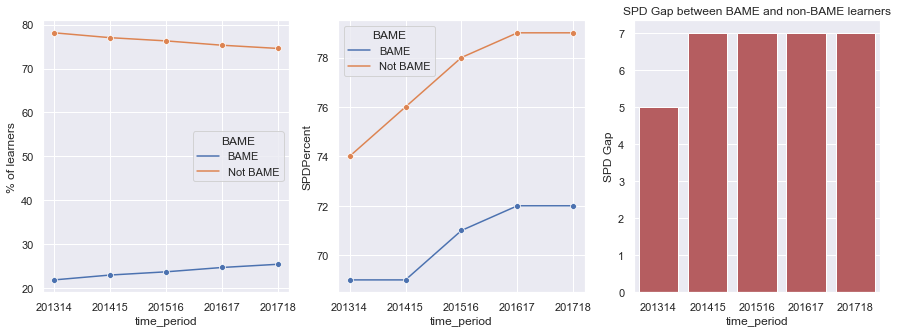

In [34]:
## BAME learners - excluding non-reported?
bame_df = filter_dataset(otcms['nd01'], 'BAME', False)
bame_df = bame_df[bame_df['BAME']!='Unknown']

bame_gp, bame_gap = parse_for_learners_and_SPD(bame_df, 'BAME')

fig = plt.figure(figsize=(15,5))

#(1) Percentage of average cohort is BAME?
_ = plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y='% of learners', hue='BAME', data=bame_gp, marker='o')

#(2) What SPD rate do BAME achieve?
_ = plt.subplot(1,3,2)
_ = sns.lineplot(x='time_period', y='SPDPercent', hue='BAME', data=bame_gp, marker='o')

#(3) Average gap between BAME and non BAME SPD?

_ = plt.subplot(1,3,3)
_ = sns.barplot(x='time_period', y='gap', data=bame_gap, color='r')
_ = plt.ylabel('SPD Gap')
_ = plt.title('SPD Gap between BAME and non-BAME learners')

plt.show()

<ipython-input-32-2c63117fcbc3>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


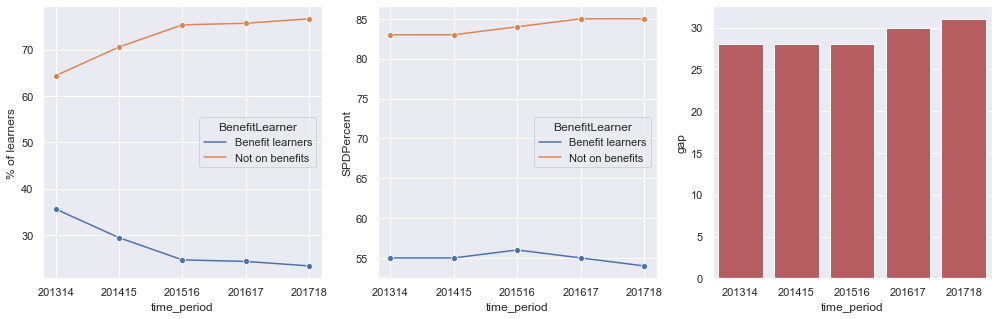

In [35]:
## Benefit Learners
bnft_df = filter_dataset(otcms['nd01'], 'BenefitLearner', False)
bnft_gp, bnft_gap = parse_for_learners_and_SPD(bnft_df, 'BenefitLearner')

fig = plt.figure(figsize=(17,5))
# (1) % of cohort by benefit status
_ = plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y='% of learners', hue='BenefitLearner', data=bnft_gp, marker='o')

# (2) SPD rates by benefit status
_ = plt.subplot(1,3,2)
_ = sns.lineplot(x='time_period', y='SPDPercent', hue='BenefitLearner', data=bnft_gp, marker='o')

# (3) the gap between learners
_ = plt.subplot(1,3,3)
_ = sns.barplot(x='time_period', y='gap', data=bnft_gap, color='r')
plt.show()

<ipython-input-32-2c63117fcbc3>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[f]


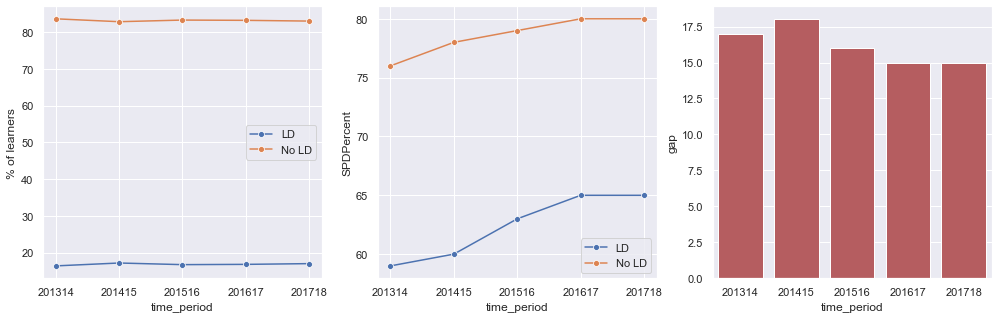

In [36]:
# Learning difficulties
ld_df = filter_dataset(otcms['nd01'], 'LearningDifficulties', False)
ld_df = ld_df[ld_df['LearningDifficulties']!='Not known/ Not provided']
ld_gp, ld_gap = parse_for_learners_and_SPD(ld_df, 'LearningDifficulties')

fig = plt.figure(figsize=(17,5))
# (1) % of cohort by ld status
_ = plt.subplot(1,3,1)
_ = sns.lineplot(x='time_period', y='% of learners', hue='LearningDifficulties', data=ld_gp, marker='o')
_ = plt.legend(['LD', 'No LD'])

# (2) SPD rates by ld status
_ = plt.subplot(1,3,2)
_ = sns.lineplot(x='time_period', y='SPDPercent', hue='LearningDifficulties', data=ld_gp, marker='o')
_ = plt.legend(['LD', 'No LD'])

# (3) the gap between learners
_ = plt.subplot(1,3,3)
_ = sns.barplot(x='time_period', y='gap', data=ld_gap, color='r')
plt.show()

### 4. CoL Apprenticeship Data

In [850]:
datasets = os.listdir(ds_dir)
app = datasets.index('CoL Apprenticeships')
file_path = os.path.join(ds_dir, datasets[app], 'Apprentice Data.xlsx')
col_app = pd.read_excel(file_path)

## Simplifying ehtnicity categories
def simplify_ethnic_category(df):
    col = 'Ethnic Group'
    not_me = ['31 - English / Welsh / Scottish / Northen Irish / British', '34 - Any other white background', '32 - Irish']
    unknown = ['99 - Not provided']
    me = [eg for eg in df[col].unique() if (eg not in not_me) & (eg not in unknown)]
    fdf = df.copy
    df['Ethnic Group S'] = np.where(df[col].isin(me), 'ME',
                                   np.where(df[col].isin(not_me), 'Not ME', 'Not specified')
                                        )
    df.rename(columns={col : 'Ethnic Group OG','Ethnic Group S':col}, inplace=True)
    return df, not_me, unknown, me

def simplify_age_category(df):
    col = 'Age Range (Inclusive)'
    new_ranges = [['18-19', '20-21', '22-25'], ['26-29', '30-39', '40-49'], ['50-59']]
    df['Age Range'] = np.where(df[col].isin(new_ranges[0]),'18-25',
                               np.where(df[col].isin(new_ranges[1]), '26-49', '50+')
                               )
    df = df.drop(columns=col)
    return df

app_df, not_me, unknown, me = simplify_ethnic_category(col_app)
app_fdf = simplify_age_category(app_df)

CoL demographic population data estimates:
1. CoL 'Curriculum Rationale' document - 28% BAME, 55% Male, 2/3rds (of 8700) are 16-64(working age)
2. LDS info (2018) - population of 7681, 29.5% BAME,  55.6% Male, 71% 16-64,
(https://iao.blob.core.windows.net/publications/reports/f11c199d237c4cb79bca5427bfe8511d/E09000001.html)

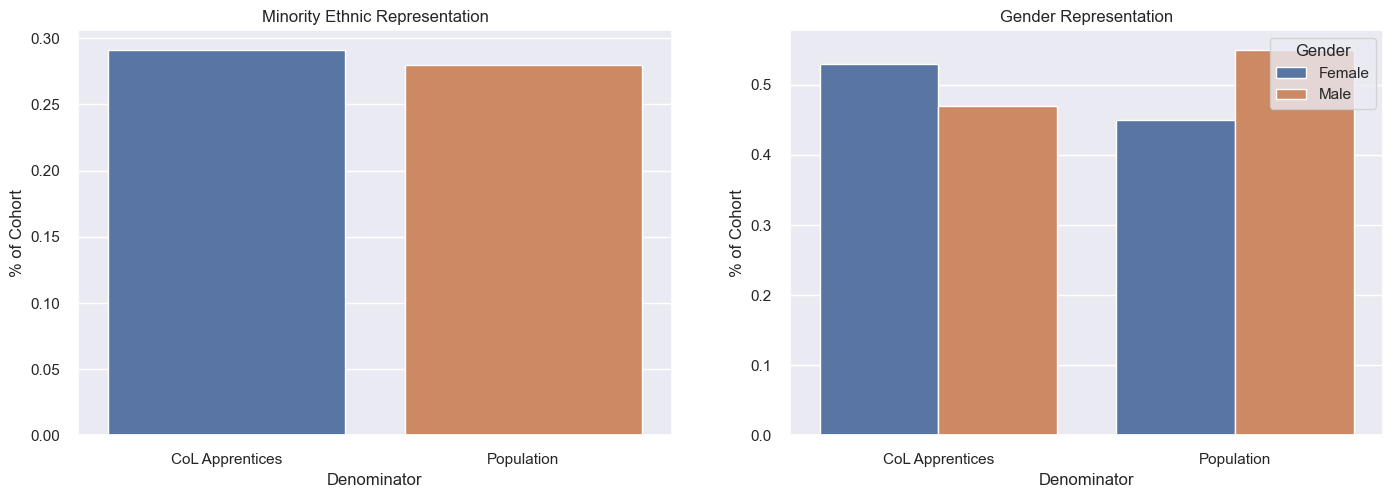

In [854]:
comparable = ['Gender', 'Ethnic Group']

fig = plt.figure(figsize=(15,5))
for c in comparable:
    df = app_fdf[c].value_counts(normalize=True).to_frame().reset_index(drop=False).rename(columns={c:'%', 'index':c})
    df['Denominator'] ='CoL Apprentices'
    if c == 'Ethnic Group':
        df = df[df['Ethnic Group'] == 'ME']
        df2 = pd.DataFrame()
        df2[[c, '%', 'Denominator']] = [['BAME', 0.28, 'Population']]
        df = df.append(df2)
        _ = plt.subplot(1,2,1)
        _ = sns.barplot(data=df, x='Denominator', y='%')
        _ = plt.title('Minority Ethnic Representation')
    else:
        df2 = pd.DataFrame()
        df2[[c, '%', 'Denominator']] = [['Male', 0.55, 'Population'],['Female', 0.45, 'Population']]
        df = df.append(df2)

        _ = plt.subplot(1,2,2)
        _ = sns.barplot(data=df, x='Denominator', y='%', hue=c)
        _ = plt.title('Gender Representation')
        
    _ = plt.ylabel('% of Cohort')

plt.show()

In [768]:
print(app_fdf['Start Date'].min())
print(app_fdf['Start Date'].max())

2015-09-29 00:00:00
2020-11-11 00:00:00


In [ ]:
age_grp = acl_df.groupby(['Year','Age Group']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
age_grp['% of learners'] = age_grp['Learners']/age_grp.groupby(['Year'])['Learners'].transform('sum')


fig = plt.figure(figsize=(15,5))
_ = plt.subplot(1,3,2)
_ = sns.barplot(x='Year', y='% of learners', hue='Age Group', data=age_grp)

_ = plt.subplot(1,3,1)
_ = sns.barplot(x='Year', y='Learners', hue='Age Group', data=age_grp)


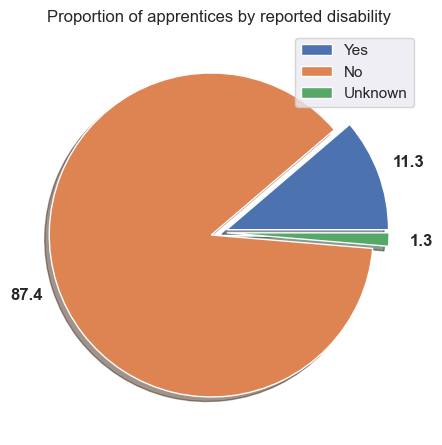

In [896]:
fig = plt.figure(figsize=(10, 5))
plot_df = app_fdf.groupby(['Disabled']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
_ = plt.pie(plot_df['Learners'], autopct='%.1f', pctdistance = 1.2, shadow=True, explode = [0.05, 0.05,0.05], 
            wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold'})
_ = plt.legend(['Yes', 'No', 'Unknown'])
_ = plt.title('Proportion of apprentices by reported disability')
fig.savefig('Proportion of apprenticeships by reported disability.png',  dpi=fig.dpi)

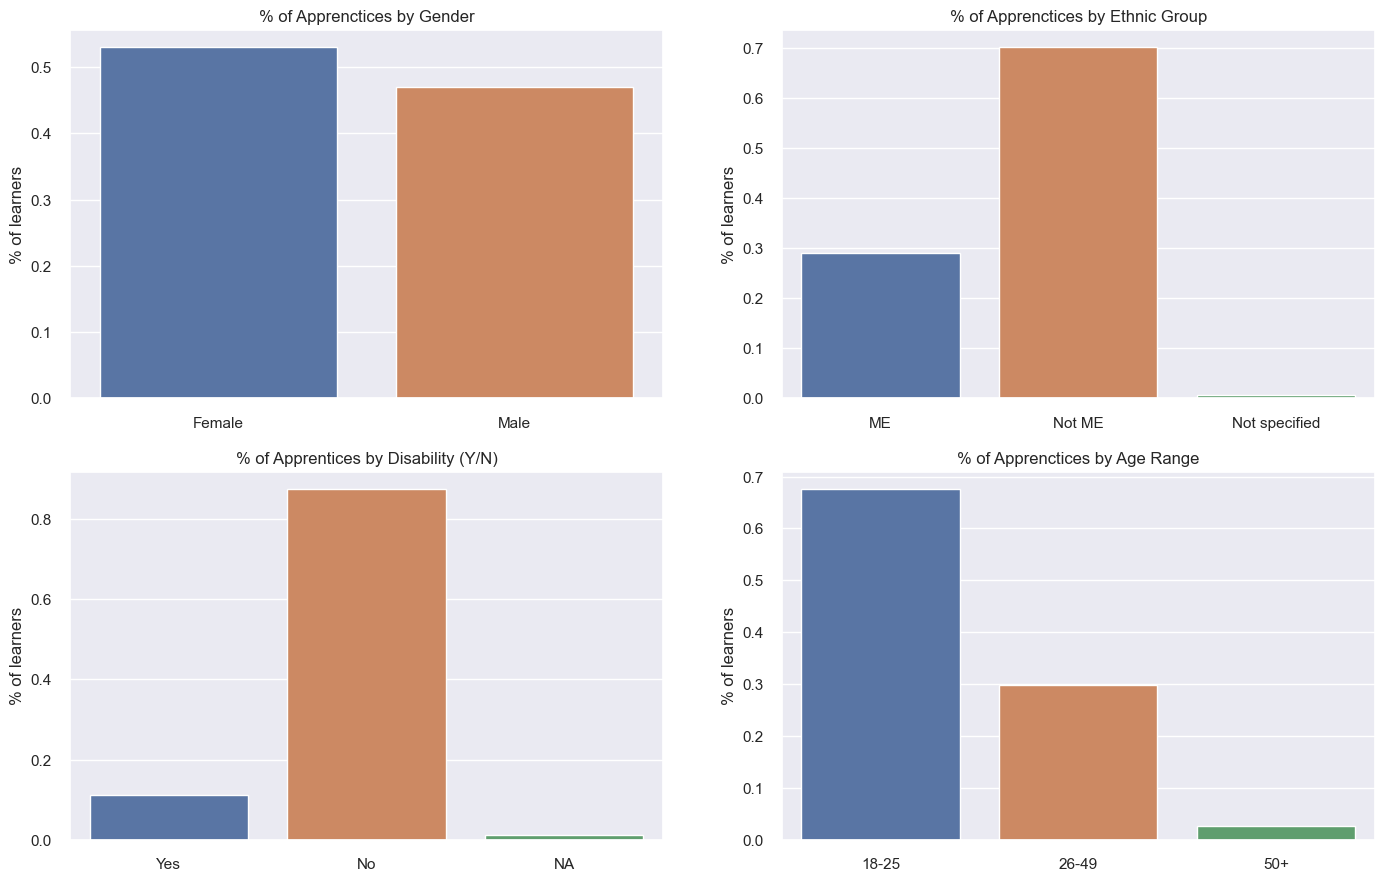

In [664]:
seg_cols = ['Gender', 'Ethnic Group', 'Disabled', 'Age Range']

fig = plt.figure(figsize=(15,10))
for i,c in enumerate(seg_cols):
    plot_index = i+1
    df = app_fdf[c].value_counts(normalize=True).to_frame().sort_index()
    _ = plt.subplot(2,2,plot_index)
    if c =='Disabled':
        _ = plt.title('% of Apprentices by Disability (Y/N)')
        _ = sns.barplot(x=['Yes','No', 'NA'], y=c, data=df)
    else:
        _ = plt.title('% of Apprenctices by ' + c)
        _ = sns.barplot(x=df.index, y=c, data=df)
    _ = plt.ylabel('% of learners')

plt.show()

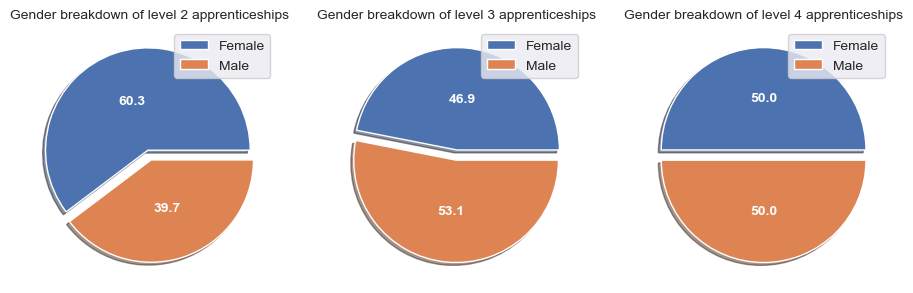

In [829]:
df = col_app.copy()

for i, c in enumerate(col_app['Levy Training area and Level']):
    words = c.split(' ')
    if words[-1] == '':
        new_c = ' '.join(words[0:-1])
        df.loc[i, 'Levy Training area and Level'] = new_c
    else:
        pass
    
df['level'] = df.apply(lambda row: row['Levy Training area and Level'].split(' ')[-1], axis=1)

plot_df2 = df.groupby('level')['Gender'].value_counts().to_frame().rename(columns={'Gender':'Learners'}).reset_index(drop=False)
plot_df2

fig = plt.figure(figsize=(10,5))
for i, l in enumerate(plot_df2['level'].unique()):
    df = plot_df2[plot_df2['level']==l].sort_values('Gender')
    _ = plt.subplot(1,3, i+1)
    _ = plt.pie(df['Learners'], autopct='%.1f', pctdistance = 0.5, shadow=True, explode = [0.05, 0.05],
            wedgeprops = {'linewidth': 1}, textprops = {'fontsize':10, 'weight':'bold', 'color':'white'})
    _ = plt.legend(df['Gender'], loc = 'upper right', fontsize=10)
    _ = plt.title('Gender breakdown of level ' + l + ' apprenticeships', fontsize=10)

plt.show()
fig.savefig('Apprenticeship level gender breakdown.png',  dpi=fig.dpi, bbox_inches='tight')

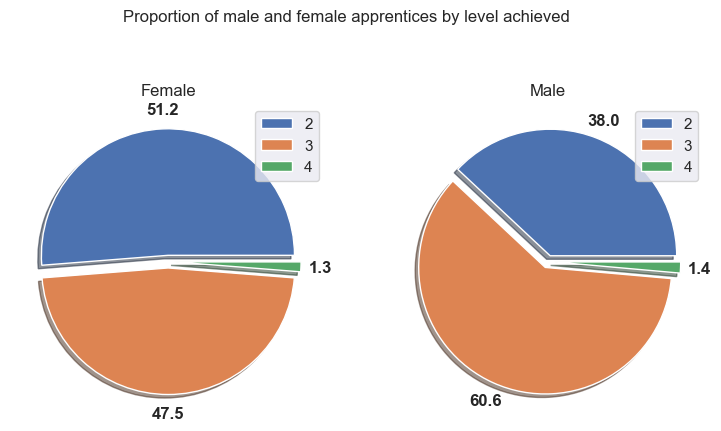

In [978]:
df = col_app.copy()

for i, c in enumerate(col_app['Levy Training area and Level']):
    words = c.split(' ')
    if words[-1] == '':
        new_c = ' '.join(words[0:-1])
        df.loc[i, 'Levy Training area and Level'] = new_c
    else:
        pass
    
df['level'] = df.apply(lambda row: row['Levy Training area and Level'].split(' ')[-1], axis=1)

plot_df2 = df.groupby('Gender')['level'].value_counts().to_frame().rename(columns={'level':'Learners'}).reset_index(drop=False)
plot_df2

fig = plt.figure(figsize=(8,5))
for i, g in enumerate(plot_df2['Gender'].unique()):
    df = plot_df2[plot_df2['Gender']==g].sort_values('level')
    _ = plt.subplot(1,2, i+1)
    _ = plt.pie(df['Learners'], autopct='%.1f', pctdistance = 1.15, shadow=True, explode = [0.05, 0.05,0.05], 
            wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold'})
    _ = plt.legend(df['level'], loc = 'upper right')
    _ = plt.title(g)

fig.suptitle('Proportion of male and female apprentices by level achieved', fontsize=12)
plt.show()
fig.savefig('Gender apprenticeships by level achieved.png',  dpi=fig.dpi, bbox_inches='tight')

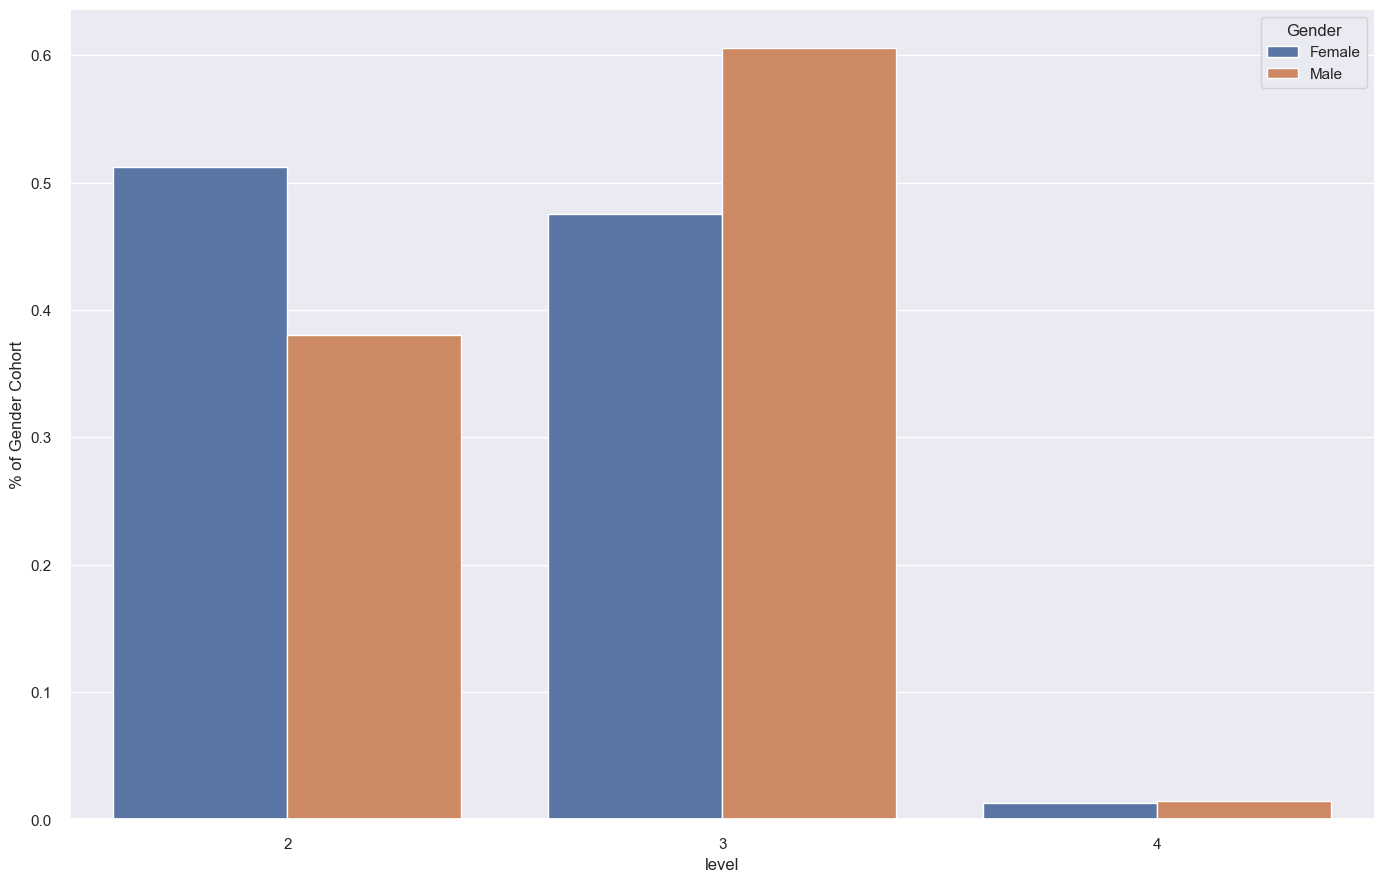

In [750]:
df = col_app.copy()

for i, c in enumerate(col_app['Levy Training area and Level']):
    words = c.split(' ')
    if words[-1] == '':
        new_c = ' '.join(words[0:-1])
        df.loc[i, 'Levy Training area and Level'] = new_c
    else:
        pass
    
df['level'] = df.apply(lambda row: row['Levy Training area and Level'].split(' ')[-1], axis=1)

plot_df = df.groupby('Gender')['level'].value_counts(normalize=True).to_frame().rename(columns={'level':'% of Gender Cohort'}).reset_index(drop=False)
plot_df

fig = plt.figure(figsize=(15,10))
_ = sns.barplot(x='level', y='% of Gender Cohort', hue='Gender', data=plot_df)
plt.show()

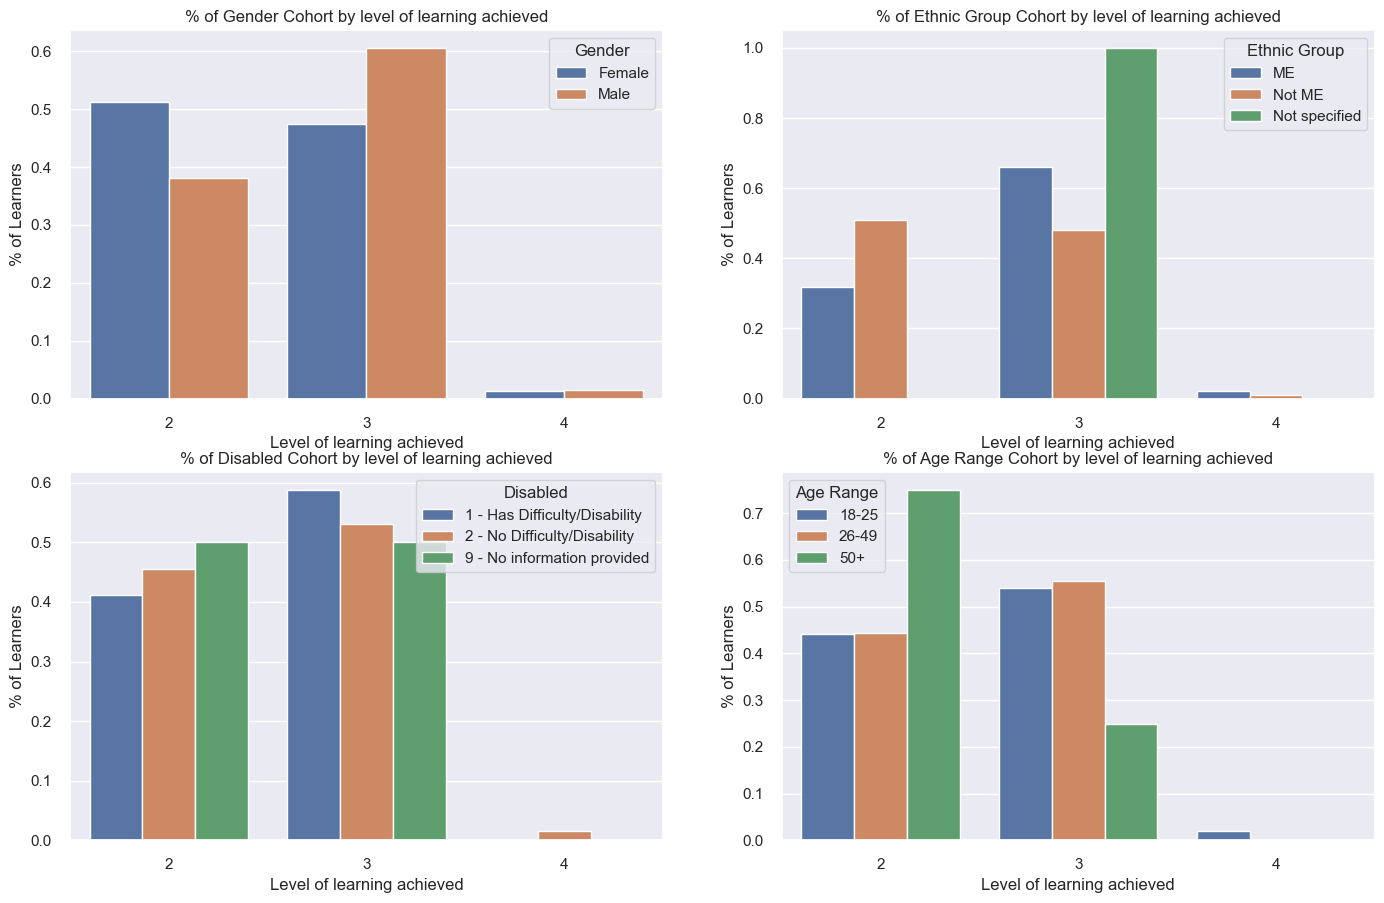

In [665]:
df = col_app.copy()

for i, c in enumerate(col_app['Levy Training area and Level']):
    words = c.split(' ')
    if words[-1] == '':
        new_c = ' '.join(words[0:-1])
        df.loc[i, 'Levy Training area and Level'] = new_c
    else:
        pass
    
df['level'] = df.apply(lambda row: row['Levy Training area and Level'].split(' ')[-1], axis=1)

fig = plt.figure(figsize=(15,10))
for i,c in enumerate(seg_cols):
    plot_df = df.groupby(c)['level'].value_counts(normalize=True).to_frame().sort_index().rename(columns={'level':'%'})
    plot_df.reset_index(level='level', inplace=True, drop=False)
    _ = plt.subplot(2,2,i+1)
    _ = sns.barplot(x='level', y='%', hue=plot_df.index, data=plot_df)
    _ = plt.ylabel('% of Learners')
    _ = plt.xlabel('Level of learning achieved')
    _ = plt.title('% of ' + c + ' Cohort by level of learning achieved')
plt.show()

### CoL ACL Data 2019-2021

In [935]:
simplified_courses = []
for x in acl_df['Course Title']:
    words = x.split('-')
    try:
        simplified_courses.append(words[0])
    except:
        np.nan
    
acl_df['Simplified Course Title'] = simplified_courses

In [948]:
f = acl_df.groupby(['Category', 'Simplified Course Title']).size().to_frame().reset_index(drop=False)
f = f[np.logical_and(f['Category'].isin(['Adult Skills', 'Community Learning']), f[0]>=10)]
f = f.sort_values(['Category', 0], ascending=False)
f.to_excel('AAAAA.xlsx')

In [917]:
cl = acl_df[acl_df['Category']== 'Community Learning']
d = cl.groupby(['Department', 'Course Title']).size().to_frame()
d

0
Department               Course Title                                          
Art & Craft              Art in the Gallery - Autumn 19/20                   14
                         Art in the Gallery - Autumn 20/21                    9
                         Art in the Gallery - Autumn 21/22                   17
                         Art in the Gallery - Spring 19/20                   13
                         Art in the Gallery - Spring 20/21                    9
...                                                                          ..
Professional Development IT  (Word & Excel) - Summer 20/21                    7
                         Skills for Life and Work - Autumn 19/20              1
                         Skills for Life and Work at Avondale Estate - A...   3
                         Skills for Life: Preparation for Work Spring 21/22   1
                         Skills for Life: Preparation for Work Summer 21/22   1

[287 rows x 1 columns]

In [903]:
## Reading in files, appending into one dataframe
acl_dir = os.path.join(ds_dir, 'CoL ACL')

acl_df = pd.DataFrame()
for f in os.listdir(acl_dir):
    df = pd.read_excel(os.path.join(acl_dir,f), header=4)
    if 'Unnamed: 7' in df.columns:
        df.drop(columns='Unnamed: 7', inplace=True)
    else:
        pass
    words = f.split(' ')
    df['Year'] = words[0]
    acl_df = acl_df.append(df)
    

def format_acl_df(acl_df):   
    acl_df = acl_df[acl_df['Course Title'].notna()]
    acl_df['Date of birth'] = pd.to_datetime(acl_df['Date of birth']).dt.date
    today = date.today()
    acl_df['Years'] = np.floor((today - acl_df['Date of birth'])/ np.timedelta64(1, 'Y'))
    acl_df['Age Group'] = np.where(np.logical_and(acl_df['Years'] >= 18, acl_df['Years'] <= 25), '18-25', 
                                   np.where(np.logical_and(acl_df['Years'] >= 26, acl_df['Years'] <= 49), '26-49', '50+'
                                           )
                                  )
    acl_df['Primary Health Problem'] = acl_df['Primary Health Problem'].fillna('None Reported')
    acl_df['Health Problem'] = np.where(acl_df['Primary Health Problem'] == 'None Reported', False,True)
    acl_df['Postcode'] = acl_df['Postcode'].astype(str)
    acl_df['in borough'] = [True if b.split(' ')[0][0:3] in ['EC1', 'EC2', 'EC3', 'EC4'] else False for b in acl_df['Postcode']]
    acl_df['Ethnic Group'] = acl_df['Ethnic Group'].fillna('99 - Not provided')
    acl_df['Ethnic Group'] = acl_df['Ethnic Group'].astype(str)
    acl_df, not_me, unknown, me = simplify_ethnic_category(acl_df)
    
    for c in acl_df.columns:
        try:
            acl_df[c] = acl_df[c].fillna('Not reported')
        except:
            pass
    return acl_df


acl_df= format_acl_df(acl_df)

<ipython-input-903-d67cc89fdc90>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acl_df['Date of birth'] = pd.to_datetime(acl_df['Date of birth']).dt.date
<ipython-input-903-d67cc89fdc90>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acl_df['Years'] = np.floor((today - acl_df['Date of birth'])/ np.timedelta64(1, 'Y'))
<ipython-input-903-d67cc89fdc90>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



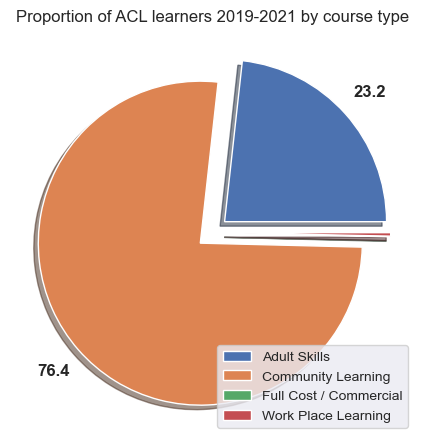

In [858]:
def my_autopct(pct):
    return ('%.1f' % pct) if pct > 1 else ''

fig = plt.figure(figsize=(10,5))
test_df = acl_df.groupby(['Category']).size().to_frame().rename(columns={0:'Category Learners'})
_ = plt.pie(test_df['Category Learners'], autopct=my_autopct, pctdistance = 1.2, shadow=True, explode = [0.1, 0.1, 0.1, 0.1], 
            wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold'})
_ = plt.legend(test_df.index, loc = 'lower right', fontsize = 10)
_ = plt.title('Proportion of ACL learners 2019-2021 by course type')
_ = plt.show()
fig.savefig('Proportion of ACL learners by course type.png',  dpi=fig.dpi)

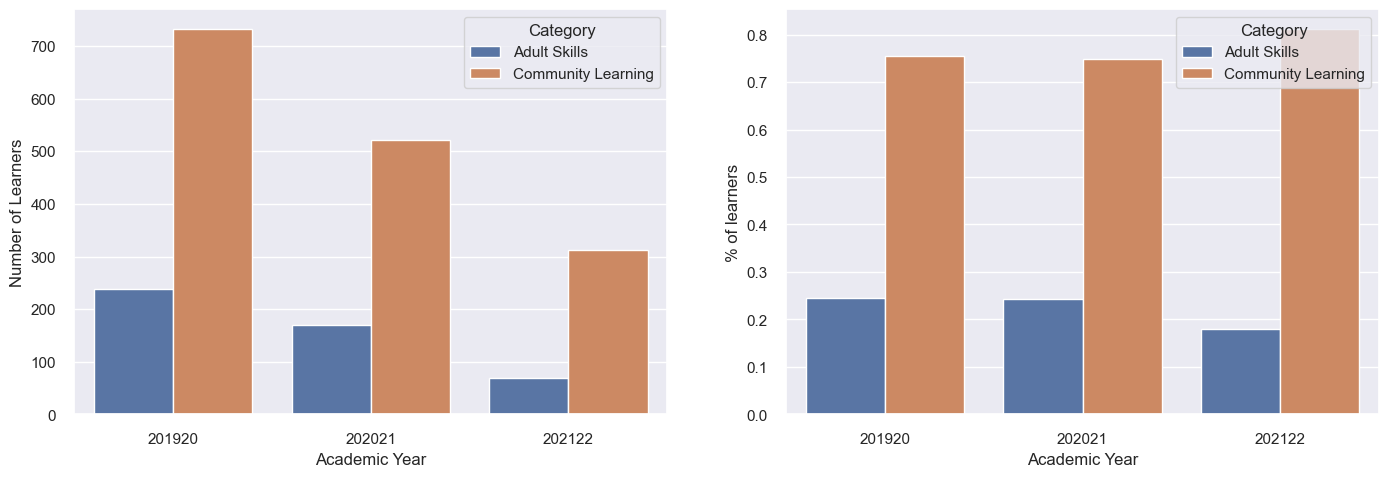

In [861]:
learners_per_year = acl_df.groupby(['Year', 'Category']).size().to_frame().rename(columns={0:'Category Learners'})
learners_per_year.reset_index(inplace=True)
learners_per_year['Total Learners'] = learners_per_year.groupby('Year')['Category Learners'].transform('sum')
learners_per_year['percentage of learners'] = learners_per_year['Category Learners']/learners_per_year['Total Learners']
plot_df = learners_per_year[learners_per_year['Category'].isin(['Adult Skills', 'Community Learning'])]

sns.set()
fig = plt.figure(figsize = (15,5))
_ = plt.subplot(1,2,1)
_ = sns.barplot(x='Year', y='Category Learners', hue='Category', data=plot_df)
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('Number of Learners')

_ = plt.subplot(1,2,2)
_ = sns.barplot(x='Year', y='percentage of learners', hue='Category', data=plot_df)
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('% of learners')

plt.show()

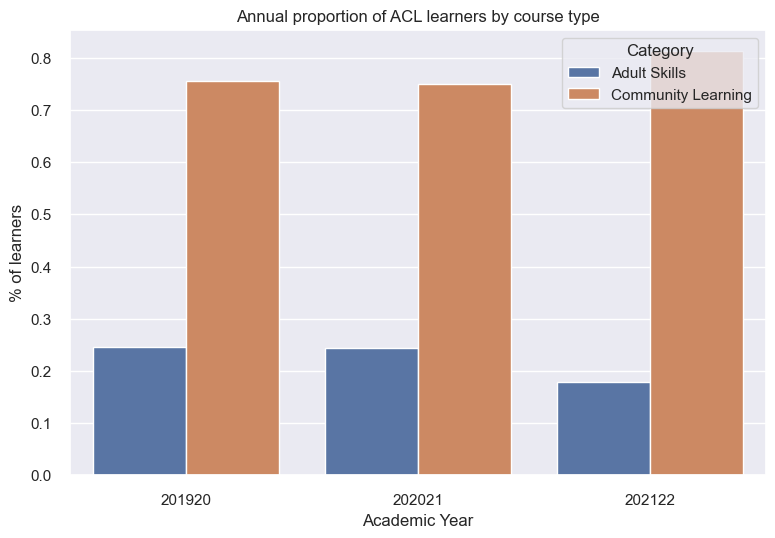

In [862]:
_ = sns.barplot(x='Year', y='percentage of learners', hue='Category', data=plot_df)
_ = plt.xlabel('Academic Year')
_ = plt.ylabel('% of learners')
_ = plt.title('Annual proportion of ACL learners by course type')
plt.savefig('Annual proportion of ACL learners by course type.png',  dpi=fig.dpi, bbox_inches='tight')

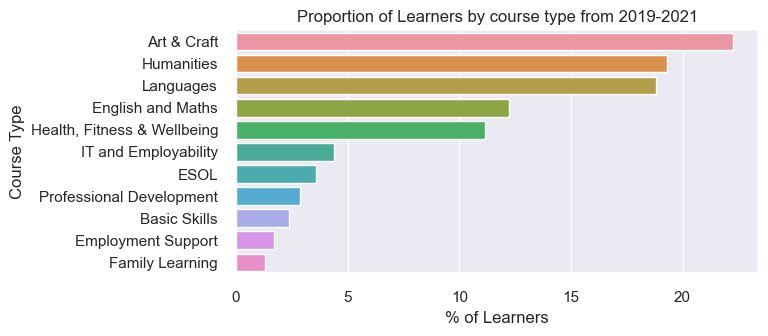

In [964]:
## Most popular courses across 3 years of data
fig = plt.figure(figsize=(6,3))
pop_dept = acl_df.groupby(['Department']).size().to_frame().rename(columns={0:'Dept Learners'}).reset_index(drop=False)
pop_dept = pop_dept.sort_values('Dept Learners', ascending=False).reset_index(drop=True)
pop_dept['% of total learners'] = (pop_dept['Dept Learners']/pop_dept['Dept Learners'].sum())*100
sns.set()
_ = sns.barplot(y='Department', x='% of total learners', data=pop_dept)
_ = plt.xlabel('% of Learners')
_ = plt.ylabel('Course Type')
_ = plt.title('Proportion of Learners by course type from 2019-2021')
fig.savefig('Popular course all learners.png',  dpi=fig.dpi, bbox_inches='tight')

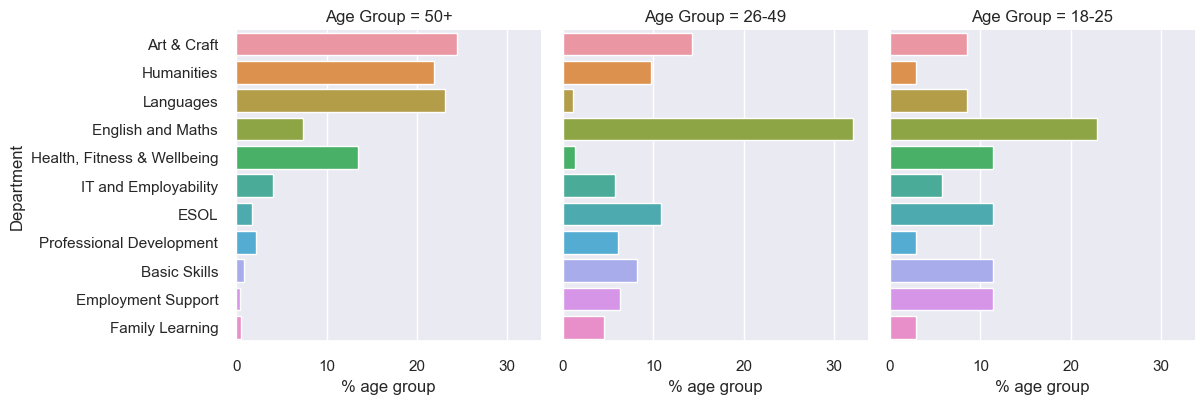

In [891]:
age_grp = acl_df.groupby(['Department','Age Group']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
age_grp['% age group'] = (age_grp['Learners']/age_grp.groupby('Age Group')['Learners'].transform('sum'))*100
age_grp = age_grp.sort_values(['Age Group', '% age group'], ascending=False)
age_grp['learners by dept'] = age_grp.groupby('Department')['Learners'].transform('sum')
age_grp = age_grp.sort_values(['Age Group', 'learners by dept'], ascending=False).reset_index(drop=True)
g = sns.catplot(x="% age group", y="Department",
                col="Age Group",
                data=age_grp, kind="bar",
                height=4, aspect=1)
plt.savefig('Popular course by age group.png',  dpi=fig.dpi, bbox_inches='tight')

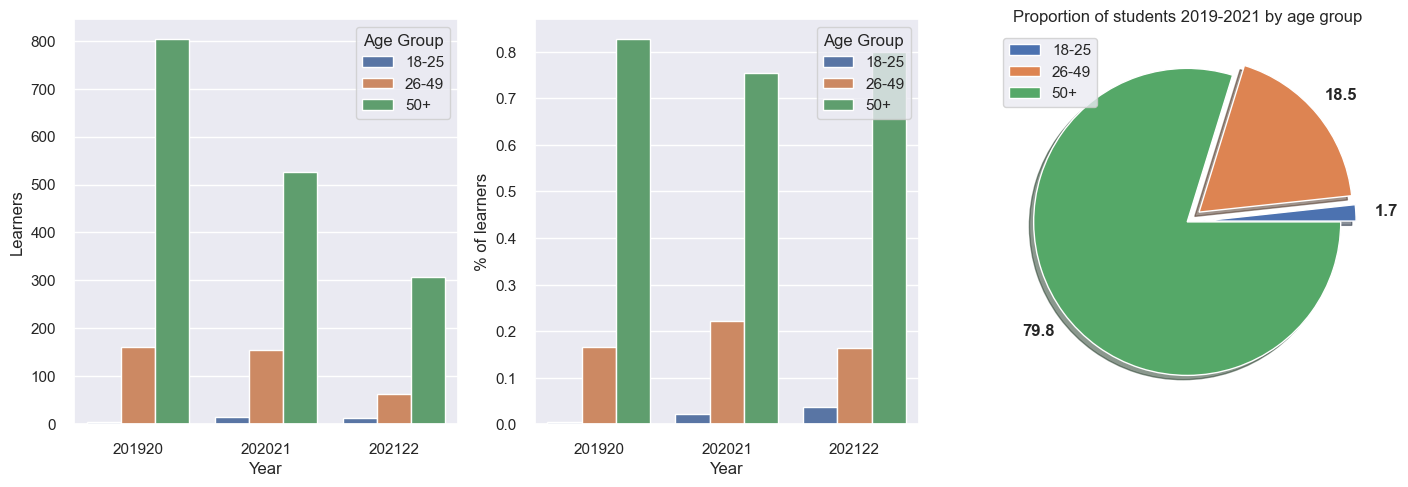

In [865]:
age_grp = acl_df.groupby(['Year','Age Group']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
age_grp['% of learners'] = age_grp['Learners']/age_grp.groupby(['Year'])['Learners'].transform('sum')


fig = plt.figure(figsize=(15,5))
_ = plt.subplot(1,3,2)
_ = sns.barplot(x='Year', y='% of learners', hue='Age Group', data=age_grp)

_ = plt.subplot(1,3,1)
_ = sns.barplot(x='Year', y='Learners', hue='Age Group', data=age_grp)

_ = plt.subplot(1,3,3)
pie_df = age_grp.groupby('Age Group')[['Learners']].sum()
_ = plt.pie(pie_df['Learners'], autopct='%.1f', pctdistance = 1.2, shadow=True, explode = [0.1, 0.1,0], 
            wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold'})
_ = plt.legend(pie_df.index)
_ = plt.title('Proportion of students 2019-2021 by age group')

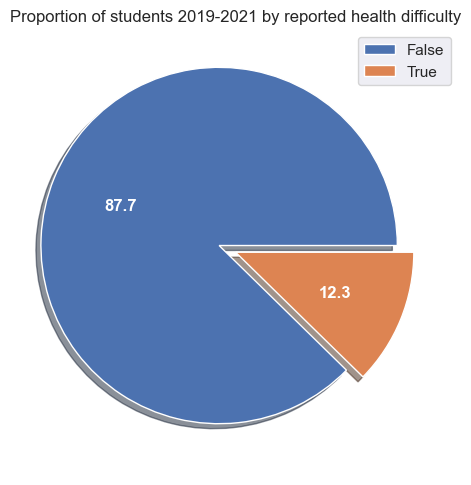

In [893]:
## Health problem yes or no
pie_df = acl_df.groupby('Health Problem').size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
_ = plt.pie(pie_df['Learners'], autopct='%.1f', pctdistance = 0.6, shadow=True, explode = [0.1, 0], 
    wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold', 'color':'white'})
_ = plt.legend(pie_df['Health Problem'])
_ = plt.title('Proportion of students 2019-2021 by reported health difficulty')
_ = plt.show()

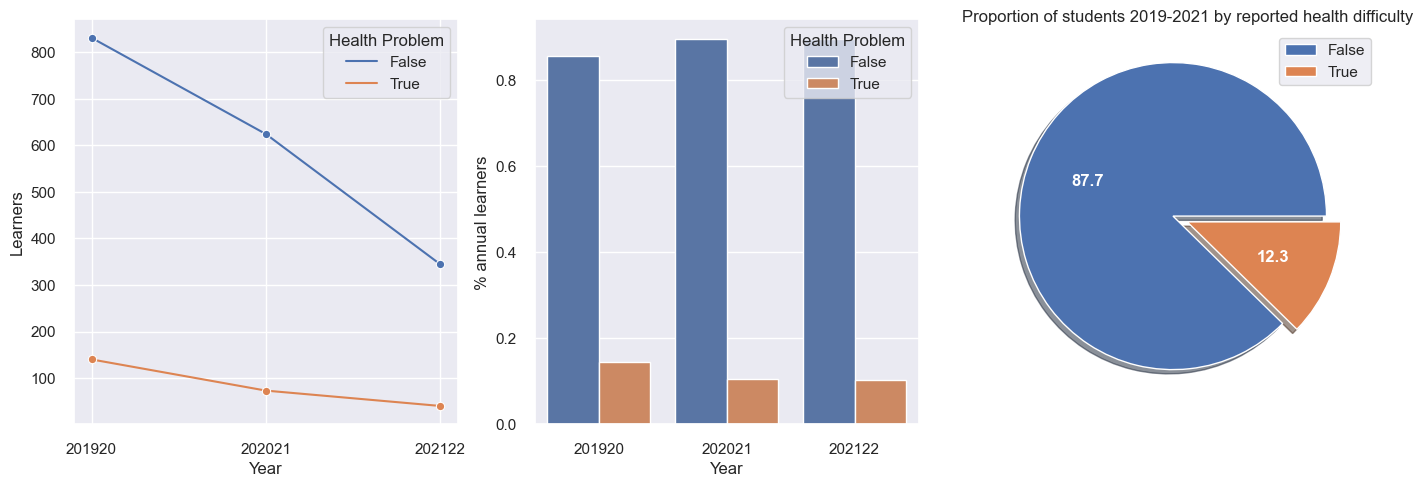

In [672]:
# Formatting for plot
acl_ld = acl_df.groupby(['Year', 'Health Problem']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
acl_ld['% annual learners'] = acl_ld['Learners']/acl_ld.groupby('Year')['Learners'].transform('sum')
ld_sp = int(acl_ld[np.logical_and(acl_ld['Year'] == '201920', acl_ld['Health Problem'] ==True)]['Learners'])
nld_sp = int(acl_ld[np.logical_and(acl_ld['Year'] == '201920',acl_ld['Health Problem'] ==False)]['Learners'])
acl_ld['Index Pop'] = np.where(acl_ld['Health Problem']==True, 
                               acl_ld['Learners']/ld_sp,
                               acl_ld['Learners']/nld_sp)

fig = plt.figure(figsize=(15,5))
for i in range(0,3):
    plot = i + 1
    _ = plt.subplot(1,3,plot)
    if plot == 1:
        _ = sns.lineplot(x='Year', y='Learners', data=acl_ld, hue='Health Problem', marker='o')
    elif plot==2:
        _ = sns.barplot(x='Year', y='% annual learners', data=acl_ld, hue='Health Problem')
    else:
        pie_df = acl_ld.groupby('Health Problem')[['Learners']].sum()
        _ = plt.pie(pie_df['Learners'], autopct='%.1f', pctdistance = 0.6, shadow=True, explode = [0.1, 0], 
            wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold', 'color':'white'})
        _ = plt.legend(pie_df.index)
        _ = plt.title('Proportion of students 2019-2021 by reported health difficulty')
plt.show()

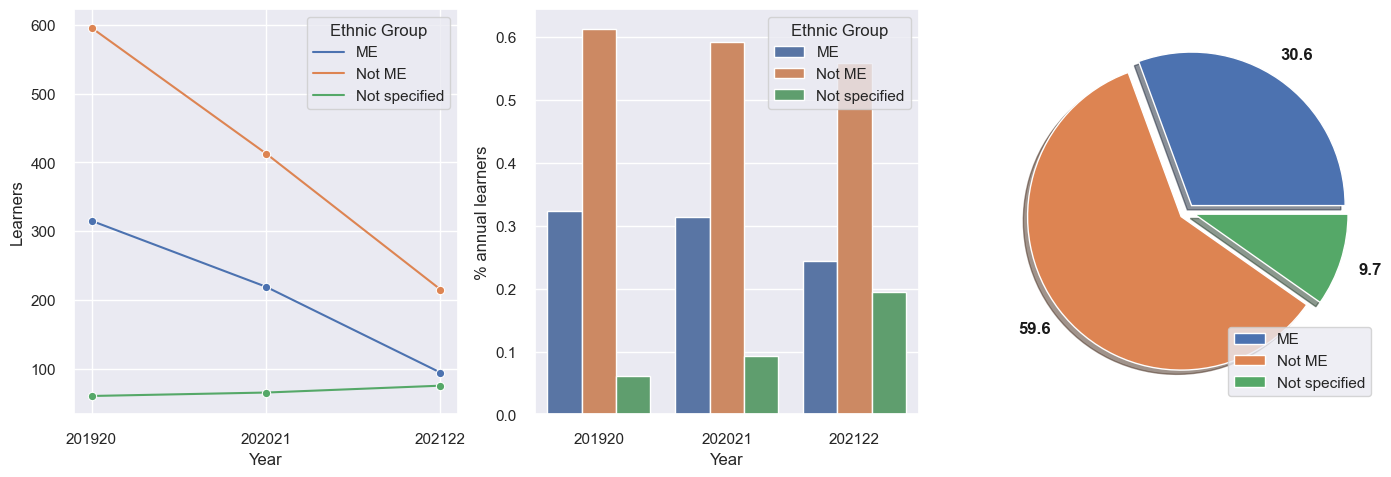

In [674]:
# acl_df = simplify_ethnic_category(acl_df)
acl_eg = acl_df.groupby(['Year', 'Ethnic Group']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
acl_eg['% annual learners'] = acl_eg['Learners']/acl_eg.groupby('Year')['Learners'].transform('sum')

og_pops = []
for eg in acl_eg['Ethnic Group']:
    og_pop = int(acl_eg[np.logical_and(acl_eg['Year'] == '201920', acl_eg['Ethnic Group'] == eg)]['Learners'])
    og_pops.append(og_pop)

acl_eg['First year pop'] = og_pops
acl_eg['Index Pop'] = acl_eg['Learners']/acl_eg['First year pop']

fig = plt.figure(figsize=(15,5))
for i in range(0,3):
    plot = i + 1
    _ = plt.subplot(1,3,plot)
    if plot == 1:
        _ = sns.lineplot(x='Year', y='Learners', data=acl_eg, hue='Ethnic Group', marker='o')
    elif plot==2:
        _ = sns.barplot(x='Year', y='% annual learners', data=acl_eg, hue='Ethnic Group')
    else:
        pie_df = acl_eg.groupby('Ethnic Group')[['Learners']].sum().reset_index(drop=False)
        _ = plt.pie(pie_df['Learners'], autopct='%.1f', pctdistance = 1.2, shadow=True, explode = [0.05,0.05,0.05], 
            wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold', 'color':'k'})
        _ = plt.legend(pie_df['Ethnic Group'], loc ='lower right')
plt.show()

In [900]:
tdf = acl_df[acl_df['Sex']!='Not reported']
tdfg = tdf.groupby('Sex').size().to_frame()
tdfg['%'] = tdfg[0] / tdfg[0].sum()
tdfg

,0,%
Sex,,
Female,1444,0.763617
Male,447,0.236383


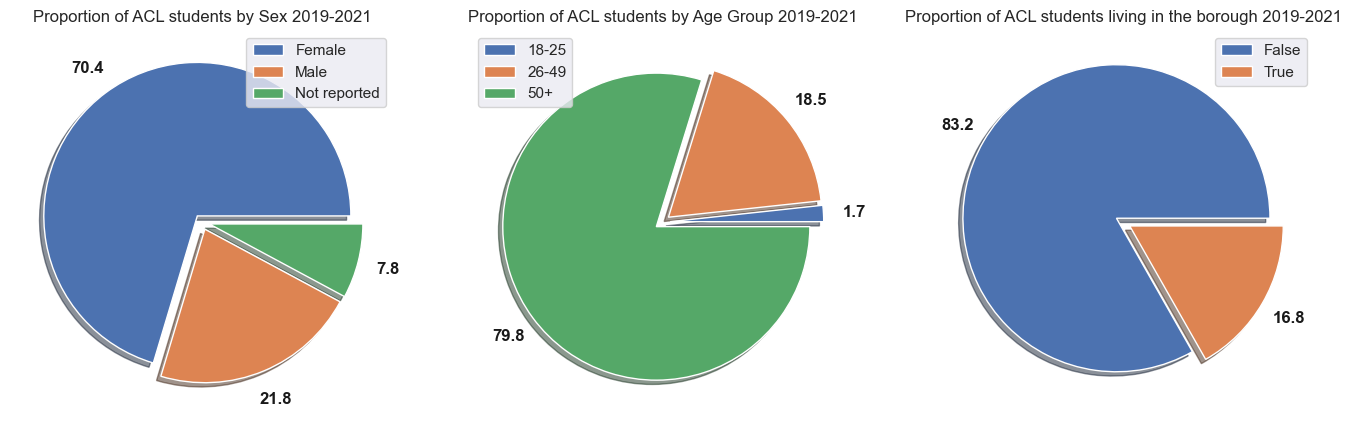

In [887]:
fig = plt.figure(figsize=(15,7))
for i,x in enumerate(['Sex', 'Age Group', 'in borough']):
    _ = plt.subplot(1,3,i+1)
    pie_df = acl_df.groupby(x).size().to_frame().rename(columns= {0:'Learners'})
    explode = [0.05] * len(pie_df)
    _ = plt.pie(pie_df['Learners'], autopct='%.1f', pctdistance = 1.2, shadow=True, explode = explode, 
    wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold', 'color':'k'})
    _ = plt.legend(pie_df.index)
    if x == 'in borough':
        _ = plt.title('Proportion of ACL students living in the borough 2019-2021')
    else:
        _ = plt.title('Proportion of ACL students by ' +  x + ' 2019-2021')

fig.savefig('ACL learners breakdown 2019-2021.png',  dpi=fig.dpi, bbox_inches='tight')

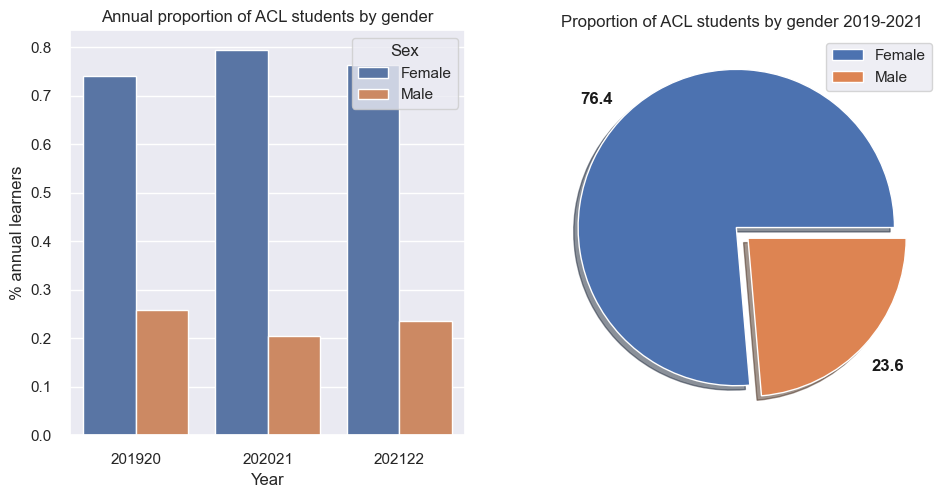

In [845]:
fig = plt.figure(figsize=(10,5))
_ = plt.subplot(1,2,1)
_ = sns.barplot(x='Year', y='% annual learners', data=acl_gn, hue='Sex')
_ = plt.title('Annual proportion of ACL students by gender')

_ = plt.subplot(1,3,1)
pie_df = acl_gn.groupby('Sex')[['Learners']].sum().reset_index(drop=False)
_ = plt.pie(pie_df['Learners'], autopct='%.1f', pctdistance = 1.2, shadow=True, explode = [0.05,0.05], 
    wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold', 'color':'k'})
_ = plt.legend(pie_df['Sex'], loc ='upper right')
_ = plt.title('Proportion of ACL students by gender 2019-2021')

fig.savefig('ACL learners by gender 2019-2021.png',  dpi=fig.dpi, bbox_inches='tight')

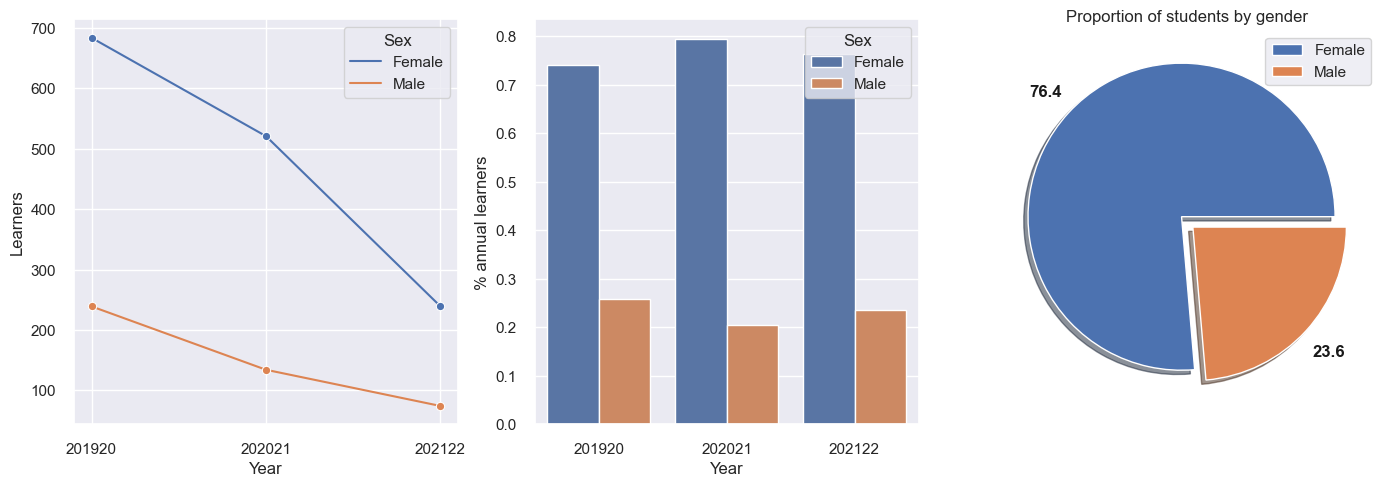

In [788]:
acl_gn = acl_df.groupby(['Year', 'Sex']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
acl_gn['% annual learners'] = acl_gn['Learners']/acl_gn.groupby('Year')['Learners'].transform('sum')

male_sp = int(acl_gn[np.logical_and(acl_gn['Year'] == '201920', acl_gn['Sex']=='Male')]['Learners'])
female_sp = int(acl_gn[np.logical_and(acl_gn['Year'] == '201920',acl_gn['Sex']=='Female')]['Learners'])
acl_gn['Index Pop'] = np.where(acl_gn['Sex']=='Male', 
                               acl_gn['Learners']/male_sp,
                               acl_gn['Learners']/female_sp)


fig = plt.figure(figsize=(15,5))
for i in range(0,3):
    plot = i + 1
    _ = plt.subplot(1,3,plot)
    if plot == 1:
        _ = sns.lineplot(x='Year', y='Learners', data=acl_gn, hue='Sex', marker='o')
    elif plot==2:
        _ = sns.barplot(x='Year', y='% annual learners', data=acl_gn, hue='Sex')
    else:
        pie_df = acl_gn.groupby('Sex')[['Learners']].sum().reset_index(drop=False)
        _ = plt.pie(pie_df['Learners'], autopct='%.1f', pctdistance = 1.2, shadow=True, explode = [0.05,0.05], 
            wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold', 'color':'k'})
        _ = plt.legend(pie_df['Sex'], loc ='upper right')
        _ = plt.title('Proportion of students by gender')
plt.show()

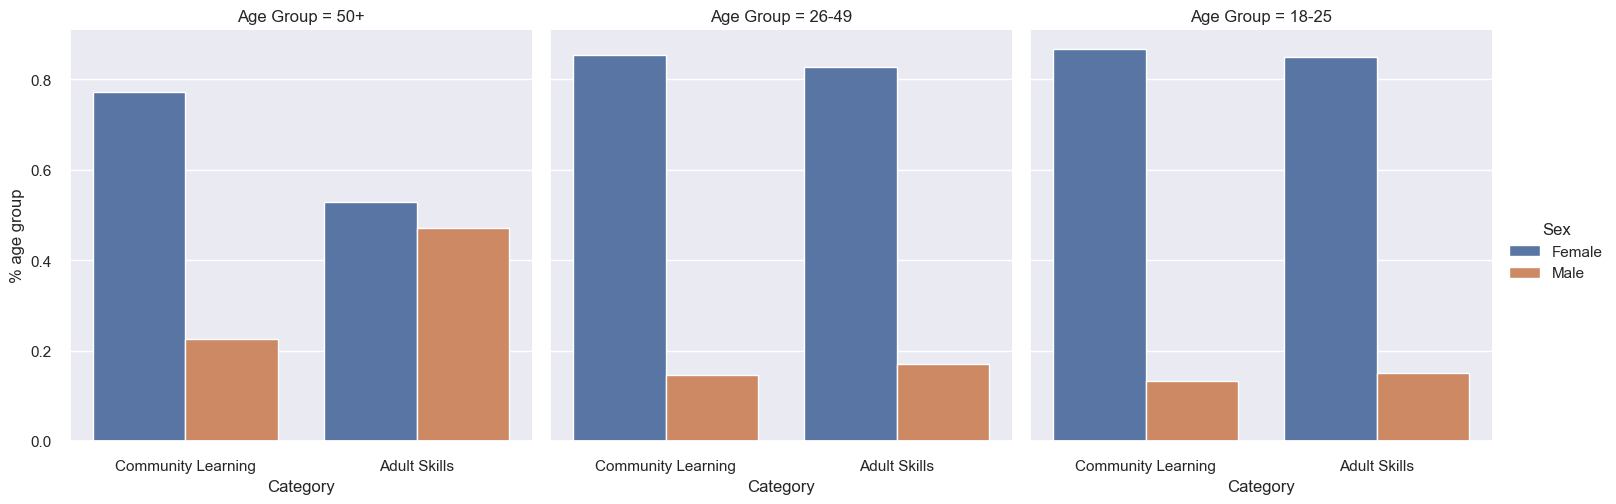

In [686]:
acl_gn_cat = acl_df.groupby(['Age Group', 'Category','Sex']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
acl_gn_cat['% age group'] = acl_gn_cat['Learners']/acl_gn_cat.groupby(['Age Group', 'Category'])['Learners'].transform('sum')
acl_gn_cat = acl_gn_cat.sort_values(['Age Group', '% age group'], ascending=False)
acl_gn_cat['learners by age group'] = acl_gn_cat.groupby(['Age Group', 'Category'])['Learners'].transform('sum')
acl_gn_cat = acl_gn_cat.sort_values(['Age Group', 'learners by age group'], ascending=False).reset_index(drop=True)
plot_df = acl_gn_cat[acl_gn_cat['Category'].isin(['Community Learning', 'Adult Skills'])]
g = sns.catplot(x="Category", y="% age group",
                col="Age Group", hue='Sex',
                data=plot_df, kind='bar',
                height=5, aspect=1)

plt.savefig('Popular course by age group.png',  dpi=fig.dpi, bbox_inches='tight')

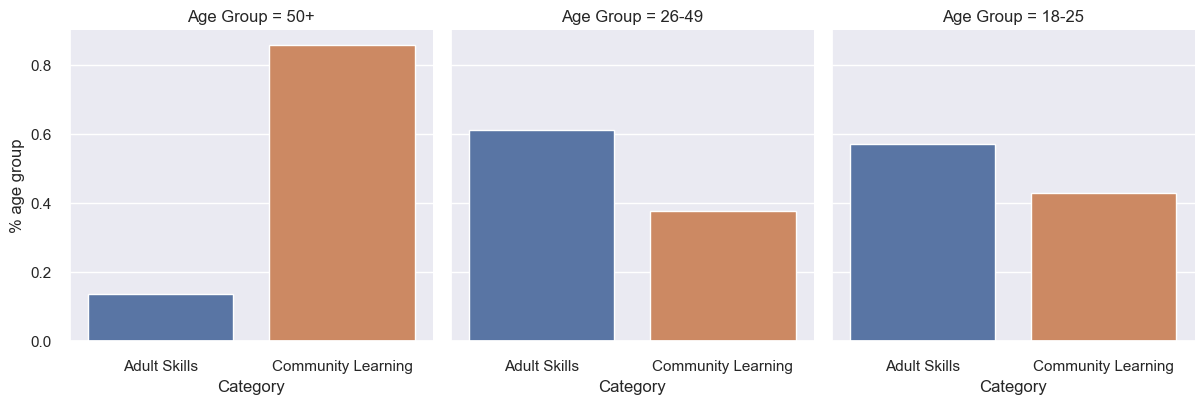

In [739]:
acl_cat1 = acl_df.groupby(['Age Group', 'Category']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
acl_cat1['% age group'] = acl_cat1['Learners']/acl_cat1.groupby(['Age Group'])['Learners'].transform('sum')
acl_cat1 = acl_cat1.sort_values(['Age Group'], ascending=False)
# acl_gn_cat['learners by age group'] = acl_gn_cat.groupby(['Age Group', 'Category'])['Learners'].transform('sum')
# acl_gn_cat = acl_gn_cat.sort_values(['Age Group', 'learners by age group'], ascending=False).reset_index(drop=True)
plot_df = acl_cat1[acl_cat1['Category'].isin(['Community Learning', 'Adult Skills'])]
g = sns.catplot(x="Category", y="% age group",
                col="Age Group",
                data=plot_df, kind='bar',
                height=4, aspect=1)

plt.savefig('Provision type by age group.png',  dpi=fig.dpi, bbox_inches='tight')

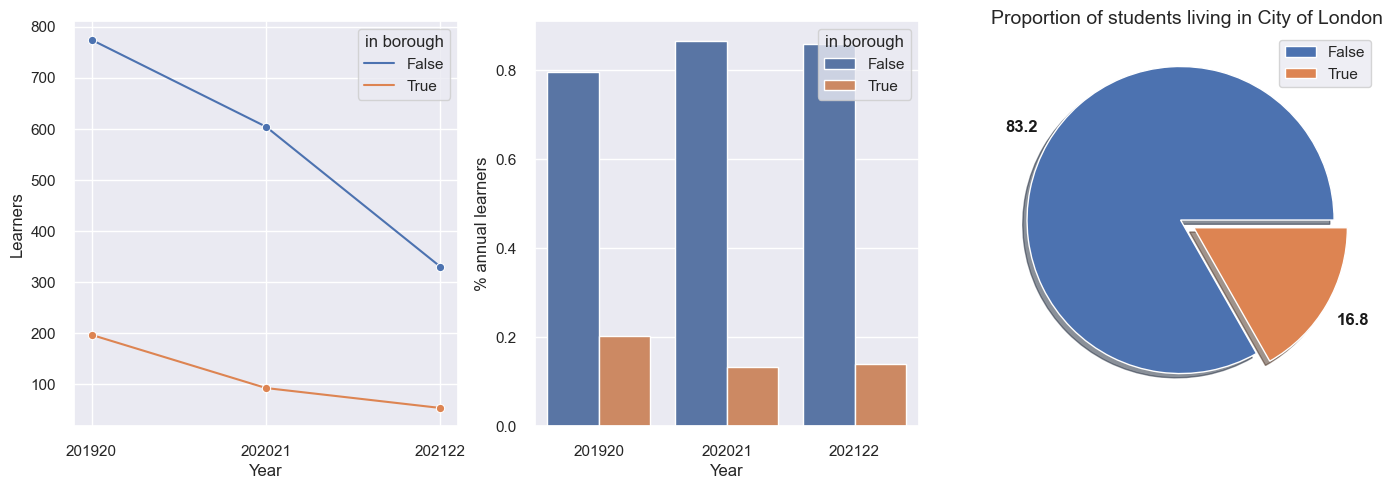

In [979]:
acl_geo = acl_df.groupby(['Year', 'in borough']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
acl_geo['% annual learners'] = acl_geo['Learners']/acl_geo.groupby('Year')['Learners'].transform('sum')

# og_pops = []
# for eg in acl_eg['Ethnic Group']:
#     og_pop = int(acl_eg[np.logical_and(acl_eg['Year'] == '201920', acl_eg['Ethnic Group'] == eg)]['Learners'])
#     og_pops.append(og_pop)

# acl_eg['First year pop'] = og_pops
# acl_eg['Index Pop'] = acl_eg['Learners']/acl_eg['First year pop']

fig = plt.figure(figsize=(15,5))
for i in range(0,3):
    plot = i + 1
    _ = plt.subplot(1,3,plot)
    if plot == 1:
        _ = sns.lineplot(x='Year', y='Learners', data=acl_geo, hue='in borough', marker='o')
    elif plot==2:
        _ = sns.barplot(x='Year', y='% annual learners', data=acl_geo, hue='in borough')
    else:
        pie_df = acl_geo.groupby('in borough')[['Learners']].sum().reset_index(drop=False)
        _ = plt.pie(pie_df['Learners'], autopct='%.1f', pctdistance = 1.2, shadow=True, explode = [0.05,0.05], 
            wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold', 'color':'k'})
        _ = plt.legend(pie_df['in borough'], loc ='upper right')
        _ = plt.title('Proportion of students living in City of London', fontsize=14)

_ = plt.grid(True)
plt.show()

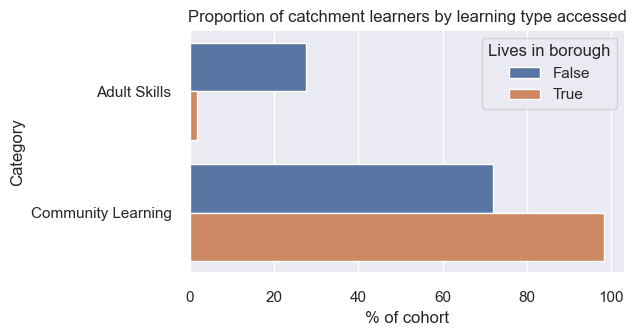

In [1019]:
fig = plt.figure(figsize=(5,3))
acl_geo1 = acl_df.groupby(['in borough', 'Category']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
acl_geo1['% of geo group'] = (acl_geo1['Learners']/acl_geo1.groupby('in borough')['Learners'].transform('sum'))*100
acl_geo1.rename(columns={'in borough': 'Lives in borough'}, inplace=True)
geo_plt1 = acl_geo1[acl_geo1['Category'].isin(['Community Learning', 'Adult Skills'])]
# g1 = sns.catplot(x="% of geo group", y="Category",
#                 col="in borough",
#                 data=geo_plt1, kind='bar',
#                 height=4, aspect=1)
_ = sns.barplot(data=geo_plt1, x='% of geo group', y='Category', hue='Lives in borough')
_ = plt.xlabel('% of cohort')
_ = plt.title('Proportion of catchment learners by learning type accessed')
fig.savefig('Category of learning by geo.png', dpi = fig.dpi, bbox_inches='tight')

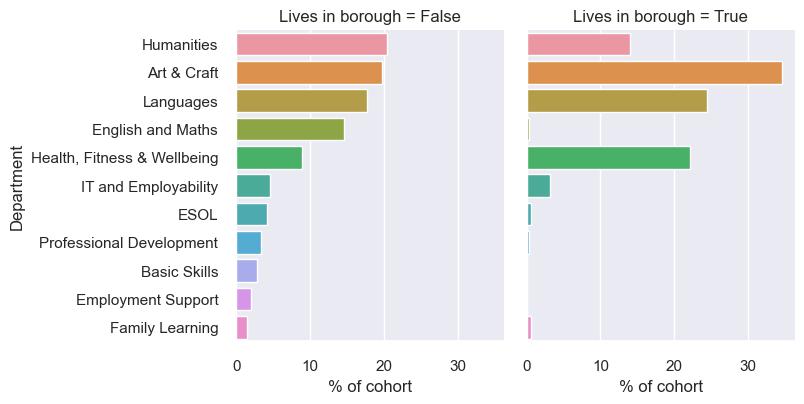

In [1011]:
acl_geo2 = acl_df.groupby(['in borough', 'Department']).size().to_frame().rename(columns={0:'Learners'}).reset_index(drop=False)
acl_geo2['% geo group'] = (acl_geo2['Learners']/acl_geo2.groupby('in borough')['Learners'].transform('sum'))*100
acl_geo2.rename(columns={'in borough': 'Lives in borough', '% geo group':'% of cohort'}, inplace=True)
acl_geo2 = acl_geo2.sort_values(['Lives in borough', '% of cohort'], ascending=[True,False])
g = sns.catplot(x='% of cohort', y='Department',col='Lives in borough', kind='bar', height=4, aspect=1, data=acl_geo2)
plt.savefig('Popular course by geo region.png',  dpi=fig.dpi, bbox_inches='tight')

### Fiddling

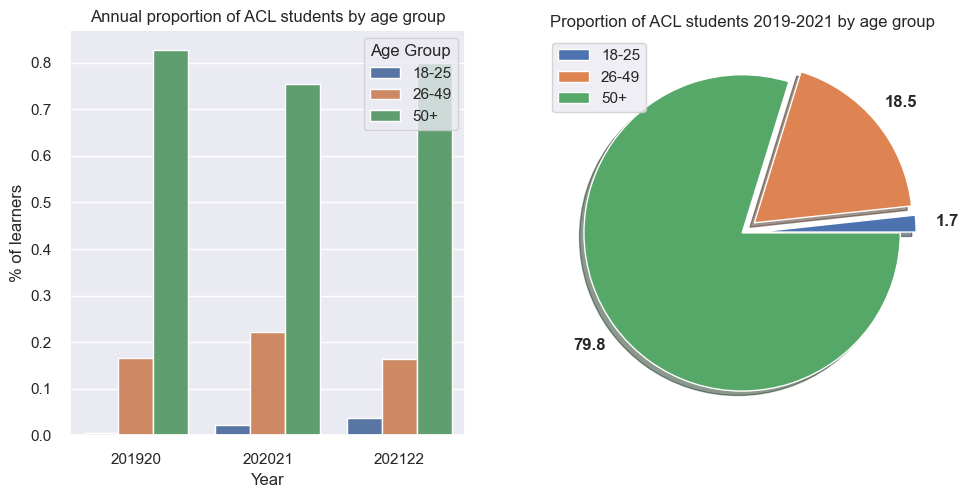

In [849]:
fig = plt.figure(figsize=(10,5))
_ = plt.subplot(1,2,1)
_ = sns.barplot(x='Year', y='% of learners', hue='Age Group', data=age_grp)
_ = plt.title('Annual proportion of ACL students by age group')

_ = plt.subplot(1,2,2)
pie_df = age_grp.groupby('Age Group')[['Learners']].sum()
_ = plt.pie(pie_df['Learners'], autopct='%.1f', pctdistance = 1.2, shadow=True, explode = [0.1, 0.1,0], 
            wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold'})
_ = plt.legend(pie_df.index)
_ = plt.title('Proportion of ACL students 2019-2021 by age group')

fig.savefig('ACL by age group.png', dpi=fig.dpi, bbox_inches='tight')

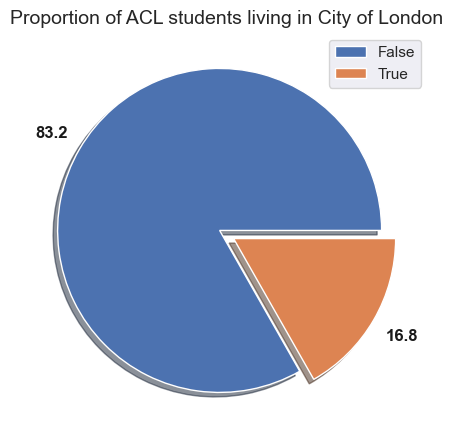

In [703]:
fig = plt.figure(figsize=(10,5))
pie_df = acl_geo.groupby('in borough')[['Learners']].sum().reset_index(drop=False)
_ = plt.pie(pie_df['Learners'], autopct='%.1f', pctdistance = 1.2, shadow=True, explode = [0.05,0.05], 
    wedgeprops = {'linewidth': 1}, textprops = {'fontsize':12, 'weight':'bold', 'color':'k'})
_ = plt.legend(pie_df['in borough'], loc ='upper right')
_ = plt.title('Proportion of ACL students living in City of London', fontsize=14)
fig.savefig('In vs out of borough acl.png', dpi=fig.dpi)
